#Import Libraries

In [2]:
from IPython.core.display import clear_output
#import important libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as express
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
import tensorflow as tf
!pip install tensorflow_addons
import tensorflow_addons as tfa
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from tqdm import tqdm
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
clear_output()

# Reading Dataset

In [3]:
#Readind dataset
# train_df = pd.read_csv('/content/drive/MyDrive/Outtawa/Machine Learning/Final Project/train.csv')
# test_df = pd.read_csv('/content/drive/MyDrive/Outtawa/Machine Learning/Final Project/test.csv')
# validation_df = pd.read_csv('/content/drive/MyDrive/Outtawa/Machine Learning/Final Project/val.csv')

train_df=pd.read_csv('train.csv')
validation_df=pd.read_csv('val.csv')
test_df=pd.read_csv('test.csv')

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2619 entries, 0 to 2618
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Switch ID                      2619 non-null   object
 1   Port Number                    2619 non-null   object
 2   Received Packets               2619 non-null   int64 
 3   Received Bytes                 2619 non-null   int64 
 4   Sent Bytes                     2619 non-null   int64 
 5   Sent Packets                   2619 non-null   int64 
 6   Port alive Duration (S)        2619 non-null   int64 
 7   Delta Received Packets         2619 non-null   int64 
 8   Delta Received Bytes           2619 non-null   int64 
 9   Delta Sent Bytes               2619 non-null   int64 
 10  Delta Sent Packets             2619 non-null   int64 
 11  Delta Port alive Duration (S)  2619 non-null   int64 
 12  Connection Point               2619 non-null   int64 
 13  Tot

In [5]:
train_df.describe()

Received Packets  Received Bytes    Sent Bytes   Sent Packets  \
count       2619.000000    2.619000e+03  2.619000e+03    2619.000000   
mean       19929.095074    2.606639e+07  2.372645e+07   33676.567774   
std        61817.860816    3.670801e+07  3.309908e+07   90565.150583   
min           10.000000    8.560000e+02  6.025000e+03      44.000000   
25%          321.500000    8.464900e+04  5.360900e+04     333.500000   
50%         1108.000000    1.262083e+07  1.262176e+07    1243.000000   
75%         3268.500000    3.736785e+07  3.170219e+07    3727.000000   
max       352584.000000    2.589422e+08  2.130728e+08  420806.000000   

       Port alive Duration (S)  Delta Received Packets  Delta Received Bytes  \
count              2619.000000             2619.000000          2.619000e+03   
mean                890.539137              174.948835          3.254661e+05   
std                 970.916789             1028.907797          1.166624e+06   
min                  26.000000                0.000000          0.000000e+00   
25%                 136.000000                2.000000          2.780000e+02   
50%                 254.000000                4.000000          5.560000e+02   
75%                1721.000000                6.000000          8.310000e+02   
max                3317.000000            15588.000000          6.171714e+06   

       Delta Sent Bytes  Delta Sent Packets  Delta Port alive Duration (S)  \
count      2.619000e+03         2619.000000                    2619.000000   
mean       2.957171e+05          160.607866                       4.831615   
std        1.107859e+06          972.484039                       0.374279   
min        2.780000e+02            2.000000                       4.000000   
25%        2.800000e+02            2.000000                       5.000000   
50%        5.560000e+02            4.000000                       5.000000   
75%        7.590000e+02            5.000000                       5.000000   
max        6.302910e+06        15593.000000                       5.000000   

       Connection Point  Total Load/Rate  Total Load/Latest  \
count       2619.000000     2.619000e+03       2.619000e+03   
mean           2.450935     2.044276e+04       5.033087e+05   
std            1.159286     1.141013e+05       1.796231e+06   
min            1.000000    -6.446240e+05       0.000000e+00   
25%            1.000000     0.000000e+00       0.000000e+00   
50%            2.000000     0.000000e+00       0.000000e+00   
75%            3.000000     0.000000e+00       0.000000e+00   
max            5.000000     1.260657e+06       1.275386e+07   

       Unknown Load/Rate  Unknown Load/Latest  Latest bytes counter  \
count       2.619000e+03         2.619000e+03          2.619000e+03   
mean        2.044276e+04         5.033087e+05          2.044276e+04   
std         1.141013e+05         1.796231e+06          1.141013e+05   
min        -6.446240e+05         0.000000e+00         -6.446240e+05   
25%         0.000000e+00         0.000000e+00          0.000000e+00   
50%         0.000000e+00         0.000000e+00          0.000000e+00   
75%         0.000000e+00         0.000000e+00          0.000000e+00   
max         1.260657e+06         1.275386e+07          1.260657e+06   

       Active Flow Entries  Packets Looked Up  Packets Matched  
count          2619.000000       2.619000e+03     2.619000e+03  
mean             94.972890       9.920463e+04     9.908445e+04  
std             828.181086       2.363175e+05     2.363162e+05  
min               4.000000       1.050000e+02     5.000000e+01  
25%               5.000000       2.263000e+03     2.147000e+03  
50%               6.000000       6.968000e+03     6.843000e+03  
75%               8.000000       2.163300e+04     2.140800e+04  
max            9985.000000       1.012220e+06     1.012085e+06

# EDA and FE

In [6]:
#Convert Port Number and Switch ID to Numeric using Label Encoder
port_label_encoder = LabelEncoder()
switch_id_label_encoder = LabelEncoder()
label_label_encoder = LabelEncoder()

#train
train_df['Port Number'] = port_label_encoder.fit_transform(train_df['Port Number'])
train_df['Switch ID'] = switch_id_label_encoder.fit_transform(train_df['Switch ID'])
train_df['Label'] = label_label_encoder.fit_transform(train_df['Label'])

#Validation
validation_df['Port Number'] = port_label_encoder.transform(validation_df['Port Number'])
validation_df['Switch ID'] = switch_id_label_encoder.transform(validation_df['Switch ID'])
validation_df['Label'] = label_label_encoder.transform(validation_df['Label'])

#Test
test_df['Port Number'] = port_label_encoder.transform(test_df['Port Number'])
test_df['Switch ID'] = switch_id_label_encoder.transform(test_df['Switch ID'])
test_df['Label'] = label_label_encoder.transform(test_df['Label'])

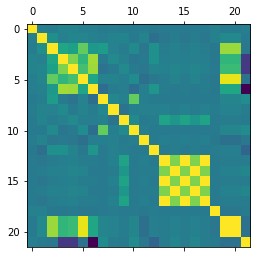

In [7]:
#plot Corrolation Matrix
plt.matshow(train_df.corr())
plt.show()

In [8]:
corr = train_df.corr()
corr.style.background_gradient(cmap='coolwarm')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


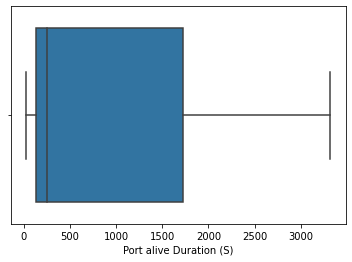

In [9]:
sns.boxplot(train_df["Port alive Duration (S)"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


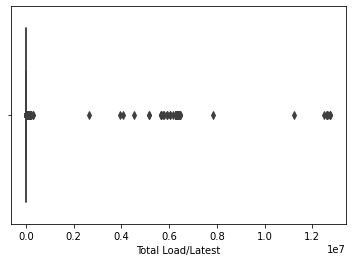

In [10]:
sns.boxplot(train_df["Total Load/Latest"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


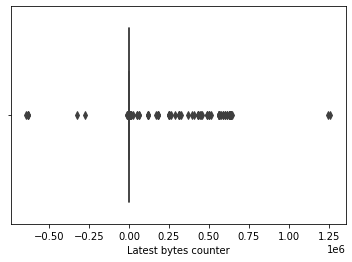

In [11]:
sns.boxplot(train_df["Latest bytes counter"])

In [12]:
train_df

Switch ID  Port Number  Received Packets  Received Bytes  Sent Bytes  \
0             3            0               240           16586    12622603   
1             3            1               158           20530       35464   
2             7            2              1930        37881404    67857371   
3             0            3               903        18946410    17900326   
4            10            0               423           29020    19138042   
...         ...          ...               ...             ...         ...   
2614          7            0               646        18927937       26139   
2615         10            1              3149        25488846    31784484   
2616         11            2               386         6324623       13285   
2617         11            1               807        12638724    25268608   
2618          0            1               545         6338371    12626198   

      Sent Packets  Port alive Duration (S)  Delta Received Packets  \
0              467                      126                       0   
1              376                      171                       4   
2           414333                     1297                       0   
3            98088                      176                       3   
4             1562                     1451                       0   
...            ...                      ...                     ...   
2614           253                      151                       2   
2615          3205                     2326                       4   
2616            97                      101                      27   
2617          1238                      366                      47   
2618           497                      161                       2   

      Delta Received Bytes  Delta Sent Bytes  ...  Connection Point  \
0                        0               280  ...                 1   
1                      556              3407  ...                 2   
2                        0               556  ...                 2   
3                      320            270280  ...                 3   
4                        0               560  ...                 1   
...                    ...               ...  ...               ...   
2614                   278               278  ...                 4   
2615                   556               556  ...                 3   
2616                526635               556  ...                 2   
2617                  3379           3939658  ...                 2   
2618                   278               278  ...                 4   

      Total Load/Rate  Total Load/Latest  Unknown Load/Rate  \
0                   0                  0                  0   
1                   0                  0                  0   
2                   0                  0                  0   
3                   0                  0                  0   
4                   0                  0                  0   
...               ...                ...                ...   
2614                0                  0                  0   
2615                0                  0                  0   
2616                0                  0                  0   
2617           630355            6303550             630355   
2618                0                  0                  0   

      Unknown Load/Latest  Latest bytes counter  Active Flow Entries  \
0                       0                     0                    4   
1                       0                     0                    5   
2                       0                     0                    8   
3                       0                     0                    8   
4                       0                     0                    4   
...                   ...                   ...                  ...   
2614                    0                     0                    6   
2615                    0     

In [13]:
#Using standard scalar to change the ranges of the dataset
standard_scalar = StandardScaler()

#train
train_df.iloc[:,:-1] = standard_scalar.fit_transform(train_df.iloc[:,:-1])
train_df

#validation
validation_df.iloc[:,:-1] = standard_scalar.transform(validation_df.iloc[:,:-1])

#test
test_df.iloc[:,:-1] = standard_scalar.transform(test_df.iloc[:,:-1])

In [14]:
train_df

Switch ID  Port Number  Received Packets  Received Bytes  Sent Bytes  \
0     -0.682386    -1.179390         -0.318563       -0.709785   -0.335537   
1     -0.682386    -0.181386         -0.319889       -0.709677   -0.715896   
2      0.382197     0.816618         -0.291219        0.321926    1.333552   
3     -1.480822     1.814622         -0.307835       -0.194000   -0.176054   
4      1.180634    -1.179390         -0.315602       -0.709446   -0.138653   
...         ...          ...               ...             ...         ...   
2614   0.382197    -1.179390         -0.311994       -0.194503   -0.716178   
2615   1.180634    -0.181386         -0.271496       -0.015737    0.243498   
2616   1.446779     0.816618         -0.316200       -0.537908   -0.716567   
2617   1.446779    -0.181386         -0.309389       -0.365867    0.046601   
2618  -1.480822    -0.181386         -0.313628       -0.537534   -0.335429   

      Sent Packets  Port alive Duration (S)  Delta Received Packets  \
0        -0.366763                -0.787591               -0.170066   
1        -0.367768                -0.741234               -0.166178   
2         4.203925                 0.418716               -0.170066   
3         0.711352                -0.736083               -0.167150   
4        -0.354670                 0.577359               -0.170066   
...            ...                      ...                     ...   
2614     -0.369126                -0.761837               -0.168122   
2615     -0.336524                 1.478742               -0.166178   
2616     -0.370849                -0.813345               -0.143820   
2617     -0.358248                -0.540355               -0.124378   
2618     -0.366431                -0.751536               -0.168122   

      Delta Received Bytes  Delta Sent Bytes  ...  Connection Point  \
0                -0.279034         -0.266725  ...         -1.251816   
1                -0.278558         -0.263902  ...         -0.389051   
2                -0.279034         -0.266476  ...         -0.389051   
3                -0.278760         -0.022965  ...          0.473713   
4                -0.279034         -0.266472  ...         -1.251816   
...                    ...               ...  ...               ...   
2614             -0.278796         -0.266727  ...          1.336478   
2615             -0.278558         -0.266476  ...          0.473713   
2616              0.172470         -0.266476  ...         -0.389051   
2617             -0.276137          3.289801  ...         -0.389051   
2618             -0.278796         -0.266727  ...          1.336478   

      Total Load/Rate  Total Load/Latest  Unknown Load/Rate  \
0           -0.179197          -0.280256          -0.179197   
1           -0.179197          -0.280256          -0.179197   
2           -0.179197          -0.280256          -0.179197   
3           -0.179197          -0.280256          -0.179197   
4           -0.179197          -0.280256          -0.179197   
...               ...                ...                ...   
2614        -0.179197          -0.280256          -0.179197   
2615        -0.179197          -0.280256          -0.179197   
2616        -0.179197          -0.280256          -0.179197   
2617         5.346377           3.229734           5.346377   
2618        -0.179197          -0.280256          -0.179197   

      Unknown Load/Latest  Latest bytes counter  Active Flow Entries  \
0               -0.280256             -0.179197            -0.109868   
1               -0.280256             -0.179197            -0.108660   
2               -0.280256             -0.179197            -0.105037   
3               -0.280256             -0.179197            -0.105037   
4               -0.280256             -0.179197            -0.109868   
...                   ...                   ...                  ...   
2614            -0.280256             -0.179197            -0.107452   
2615            -0.280256     

In [15]:
train_df.corr()

Switch ID  Port Number  Received Packets  \
Switch ID                       1.000000     0.007866         -0.004575   
Port Number                     0.007866     1.000000          0.130048   
Received Packets               -0.004575     0.130048          1.000000   
Received Bytes                  0.039926     0.019109          0.288229   
Sent Bytes                      0.045716     0.061426          0.250523   
Sent Packets                    0.011501     0.053743          0.586454   
Port alive Duration (S)         0.012039     0.026181          0.190730   
Delta Received Packets         -0.017014     0.007333          0.217001   
Delta Received Bytes           -0.006118     0.044907          0.032615   
Delta Sent Bytes               -0.018725     0.051347         -0.004067   
Delta Sent Packets             -0.013533    -0.011046          0.099098   
Delta Port alive Duration (S)  -0.007956     0.040887         -0.047986   
Connection Point               -0.030689    -0.093253          0.139496   
Total Load/Rate                -0.019625    -0.048018          0.003153   
Total Load/Latest              -0.008658    -0.007410          0.026309   
Unknown Load/Rate              -0.019625    -0.048018          0.003153   
Unknown Load/Latest            -0.008658    -0.007410          0.026309   
Latest bytes counter           -0.019625    -0.048018          0.003153   
Active Flow Entries             0.020361     0.028779         -0.032713   
Packets Looked Up              -0.011573     0.085161          0.738308   
Packets Matched                -0.011575     0.085167          0.738308   
Label                           0.006530    -0.026178         -0.042681   

                               Received Bytes  Sent Bytes  Sent Packets  \
Switch ID                            0.039926    0.045716      0.011501   
Port Number                          0.019109    0.061426      0.053743   
Received Packets                     0.288229    0.250523      0.586454   
Received Bytes                       1.000000    0.664805      0.409381   
Sent Bytes                           0.664805    1.000000      0.488391   
Sent Packets                         0.409381    0.488391      1.000000   
Port alive Duration (S)              0.758775    0.742967      0.288727   
Delta Received Packets              -0.025945   -0.070062      0.037328   
Delta Received Bytes                 0.087315   -0.013236      0.039834   
Delta Sent Bytes                     0.020199    0.092381      0.010332   
Delta Sent Packets                  -0.051105   -0.026726      0.112221   
Delta Port alive Duration (S)       -0.016965   -0.047645     -0.093916   
Connection Point                     0.134490    0.043067     -0.035295   
Total Load/Rate                      0.016245    0.028128      0.004222   
Total Load/Latest                    0.021608    0.056148      0.039614   
Unknown Load/Rate                    0.016245    0.028128      0.004222   
Unknown Load/Latest                  0.021608    0.056148      0.039614   
Latest bytes counter                 0.016245    0.028128      0.004222   
Active Flow Entries                 -0.029879   -0.027150     -0.038302   
Packets Looked Up                    0.407940    0.447338      0.937067   
Packets Matched                      0.407849    0.447260      0.937066   
Label                               -0.447717   -0.443231     -0.089128   

                               Port alive Duration (S)  \
Switch ID                                     0.012039   
Port Number                                   0.026181   
Received Packets                              0.190730   
Received Bytes                                0.758775   
Sent Bytes                                    0.742967   
Sent Packets                                  0.288727   
Port alive Duration (S)                       1.000000   
Delta Received Packets                       -0.112796   
Delta Received Bytes                          0.002851   

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Label Feature')

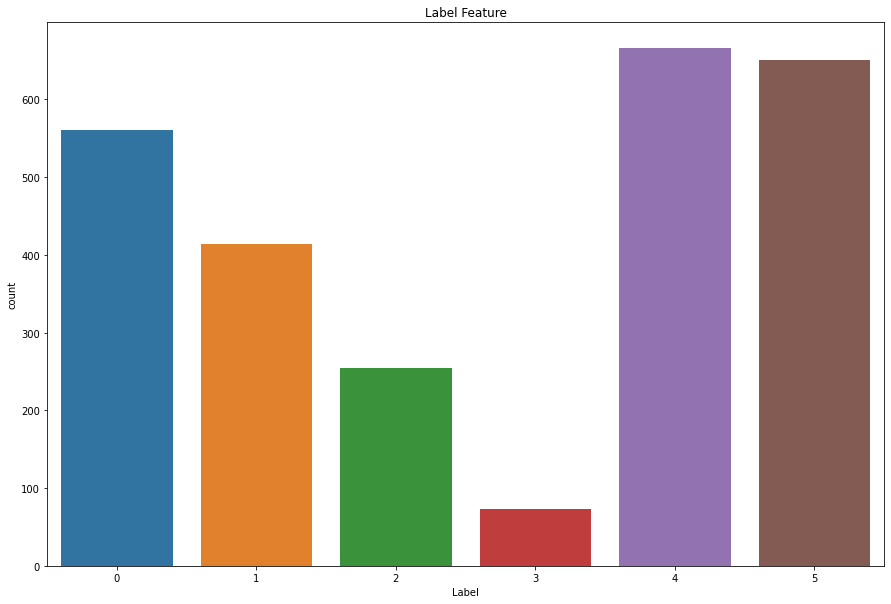

In [16]:
#show the label data to know how many classes we have as a target
plt.figure(figsize=(15,10))
sns.countplot(train_df['Label'])
plt.title("Label Feature")

## Build MLP model to make DM

In [17]:
# Split data into train, validation, test

#train
x_train = train_df.iloc[:,:-1]
y_train = train_df.iloc[:,-1]

#validation
x_validation = validation_df.iloc[:,:-1]
y_validation = validation_df.iloc[:,-1]

#test
x_test = test_df.iloc[:,:-1]
y_test = test_df.iloc[:,-1]

#build_model

In [18]:
#-----build_model------------
def build_model(no_epoch,x_train,y_train,x_validation,y_validation):
  mlp_model = keras.Sequential()
  mlp_model.add(keras.layers.Input(shape=(21,),name='Input_Layer'))
  mlp_model.add(keras.layers.Dense(10,activation = 'relu',name='Hidden_Layer_1'))
  mlp_model.add(keras.layers.Dense(6,activation = 'softmax',name='Output_Layer'))

  optimizer = tfa.optimizers.AdamW(
      learning_rate = 0.001,
      weight_decay = 0.0001
  )

  mlp_model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics='accuracy')
  results= mlp_model.fit(
    x=x_train,
    y=y_train,
    shuffle=True,
    epochs=no_epoch,
    validation_data = (x_validation,y_validation),
    batch_size=1
  )
  
  return mlp_model,results

#function

In [19]:
#----convert probabilities to classes------
def transform_pred(pred):
  transformed_pred_list=[]
  for i in range(len(pred)):
    max_index=np.argmax(pred[i])
    transformed_pred_list.append(max_index)
  return transformed_pred_list
#trans_pred=transform_pred(predicted)

In [20]:
def plot_confusion(y_test, trans_pred):
  cm = confusion_matrix(y_test, trans_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()
  plt.show()

#1.1

Epoch 1/500
2619/2619 [==============================] - 15s 4ms/step - loss: 1.2469 - accuracy: 0.5174 - val_loss: 0.8611 - val_accuracy: 0.6738
Epoch 2/500
2619/2619 [==============================] - 10s 4ms/step - loss: 0.7871 - accuracy: 0.6693 - val_loss: 0.7460 - val_accuracy: 0.6934
Epoch 3/500
2619/2619 [==============================] - 9s 3ms/step - loss: 0.7354 - accuracy: 0.6949 - val_loss: 0.7203 - val_accuracy: 0.7130
Epoch 4/500
2619/2619 [==============================] - 6s 2ms/step - loss: 0.7139 - accuracy: 0.6999 - val_loss: 0.7038 - val_accuracy: 0.7077
Epoch 5/500
2619/2619 [==============================] - 6s 2ms/step - loss: 0.7081 - accuracy: 0.7056 - val_loss: 0.6993 - val_accuracy: 0.7148
Epoch 6/500
2619/2619 [==============================] - 6s 2ms/step - loss: 0.7024 - accuracy: 0.7136 - val_loss: 0.6845 - val_accuracy: 0.7415
Epoch 7/500
2619/2619 [==============================] - 6s 2ms/step - loss: 0.6965 - accuracy: 0.7220 - val_loss: 0.6868 - val_

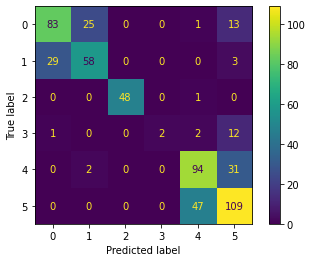

Epoch 1/500
2619/2619 [==============================] - 6s 2ms/step - loss: 1.2642 - accuracy: 0.4819 - val_loss: 0.8900 - val_accuracy: 0.6275
Epoch 2/500
2619/2619 [==============================] - 6s 2ms/step - loss: 0.8238 - accuracy: 0.6529 - val_loss: 0.7543 - val_accuracy: 0.6720
Epoch 3/500
2619/2619 [==============================] - 6s 2ms/step - loss: 0.7509 - accuracy: 0.6900 - val_loss: 0.7270 - val_accuracy: 0.6934
Epoch 4/500
2619/2619 [==============================] - 6s 2ms/step - loss: 0.7283 - accuracy: 0.6926 - val_loss: 0.7017 - val_accuracy: 0.7255
Epoch 5/500
2619/2619 [==============================] - 6s 2ms/step - loss: 0.7188 - accuracy: 0.7029 - val_loss: 0.6988 - val_accuracy: 0.7148
Epoch 6/500
2619/2619 [==============================] - 6s 2ms/step - loss: 0.7111 - accuracy: 0.7033 - val_loss: 0.6940 - val_accuracy: 0.7237
Epoch 7/500
2619/2619 [==============================] - 6s 2ms/step - loss: 0.7035 - accuracy: 0.7098 - val_loss: 0.6978 - val_ac

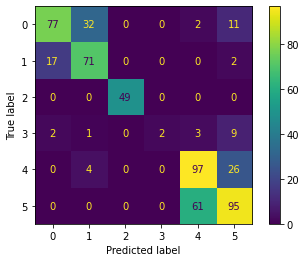

Epoch 1/500
2619/2619 [==============================] - 7s 3ms/step - loss: 1.2500 - accuracy: 0.5010 - val_loss: 0.9362 - val_accuracy: 0.6061
Epoch 2/500
2619/2619 [==============================] - 7s 3ms/step - loss: 0.8402 - accuracy: 0.6598 - val_loss: 0.7834 - val_accuracy: 0.6845
Epoch 3/500
2619/2619 [==============================] - 6s 2ms/step - loss: 0.7671 - accuracy: 0.6854 - val_loss: 0.7475 - val_accuracy: 0.7130
Epoch 4/500
2619/2619 [==============================] - 6s 2ms/step - loss: 0.7386 - accuracy: 0.6903 - val_loss: 0.7224 - val_accuracy: 0.7237
Epoch 5/500
2619/2619 [==============================] - 6s 2ms/step - loss: 0.7268 - accuracy: 0.6945 - val_loss: 0.7151 - val_accuracy: 0.6916
Epoch 6/500
2619/2619 [==============================] - 6s 2ms/step - loss: 0.7162 - accuracy: 0.6945 - val_loss: 0.7096 - val_accuracy: 0.7166
Epoch 7/500
2619/2619 [==============================] - 6s 2ms/step - loss: 0.7135 - accuracy: 0.6991 - val_loss: 0.6992 - val_ac

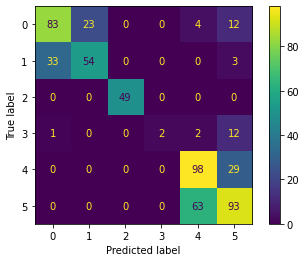

Epoch 1/500
2619/2619 [==============================] - 7s 2ms/step - loss: 1.0215 - accuracy: 0.6037 - val_loss: 0.8056 - val_accuracy: 0.6738
Epoch 2/500
2619/2619 [==============================] - 7s 3ms/step - loss: 0.7791 - accuracy: 0.6903 - val_loss: 0.7365 - val_accuracy: 0.7112
Epoch 3/500
2619/2619 [==============================] - 6s 2ms/step - loss: 0.7403 - accuracy: 0.6945 - val_loss: 0.7135 - val_accuracy: 0.7219
Epoch 4/500
2619/2619 [==============================] - 6s 2ms/step - loss: 0.7231 - accuracy: 0.7090 - val_loss: 0.7119 - val_accuracy: 0.7166
Epoch 5/500
2619/2619 [==============================] - 6s 2ms/step - loss: 0.7167 - accuracy: 0.7121 - val_loss: 0.6995 - val_accuracy: 0.7219
Epoch 6/500
2619/2619 [==============================] - 6s 2ms/step - loss: 0.7113 - accuracy: 0.7048 - val_loss: 0.6976 - val_accuracy: 0.7219
Epoch 7/500
2619/2619 [==============================] - 7s 3ms/step - loss: 0.7074 - accuracy: 0.7129 - val_loss: 0.6955 - val_ac

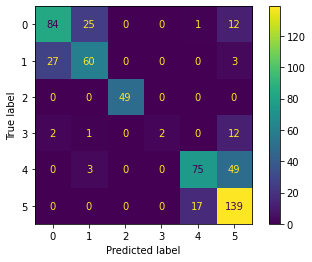

Epoch 1/500
2619/2619 [==============================] - 7s 2ms/step - loss: 1.1971 - accuracy: 0.5162 - val_loss: 0.8600 - val_accuracy: 0.6435
Epoch 2/500
2619/2619 [==============================] - 7s 3ms/step - loss: 0.8118 - accuracy: 0.6613 - val_loss: 0.7459 - val_accuracy: 0.7005
Epoch 3/500
2619/2619 [==============================] - 6s 2ms/step - loss: 0.7435 - accuracy: 0.6987 - val_loss: 0.7100 - val_accuracy: 0.7184
Epoch 4/500
2619/2619 [==============================] - 7s 3ms/step - loss: 0.7229 - accuracy: 0.7068 - val_loss: 0.7025 - val_accuracy: 0.7166
Epoch 5/500
2619/2619 [==============================] - 6s 2ms/step - loss: 0.7146 - accuracy: 0.7014 - val_loss: 0.6917 - val_accuracy: 0.7148
Epoch 6/500
2619/2619 [==============================] - 6s 2ms/step - loss: 0.7096 - accuracy: 0.7087 - val_loss: 0.6937 - val_accuracy: 0.7201
Epoch 7/500
2619/2619 [==============================] - 6s 2ms/step - loss: 0.7053 - accuracy: 0.7152 - val_loss: 0.6979 - val_ac

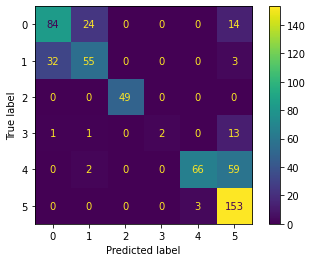

In [21]:
train_accuracy=[]
val_accuracy=[]
test_accuracy=[]
all_history=[]
average_predict=[]

for i in range(0,5):
  #----build model-------
  mlp_model,results=build_model(500,x_train,y_train,x_validation,y_validation)
  #------predict model------
  predicted=mlp_model.predict(x_test)
  #------evaluate model---------
  loss,acc=mlp_model.evaluate(x_test,y_test)
  train_accuracy.append(results.history['accuracy'])
  val_accuracy.append(results.history['val_accuracy'])
  test_accuracy.append(acc)
  average_predict.append(predicted)

  all_history.append(results)
  plot_confusion(y_test,transform_pred(predicted))

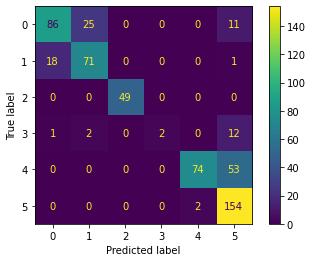

In [ ]:
#plot the average of five confusion matrix
avg_predicted=np.average(average_predict)
plot_confusion(y_test,transform_pred(average_predict[2]))

#1.2

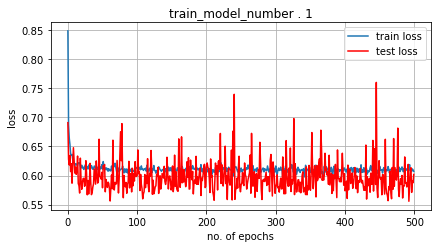

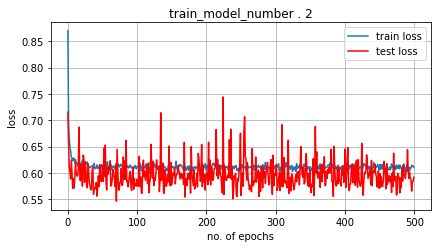

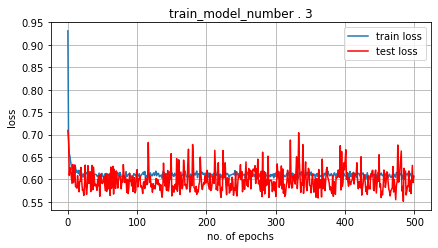

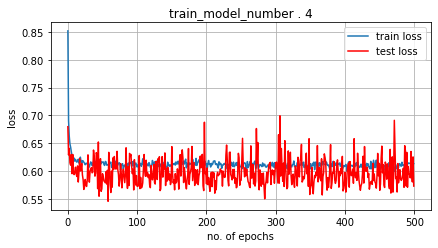

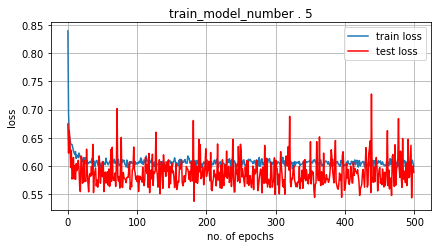

In [ ]:
from matplotlib import figure
for i, history in enumerate(all_history):
  plt.figure(figsize=(15,20))
  f=plt.subplot(5,2,i+1)
  plt.plot(history.history["loss"])
  plt.plot(history.history["val_loss"],'r')
  plt.legend(['train loss', 'test loss']) 
  plt.title("train_model_number . %d"%(i+1))
  plt.xlabel("no. of epochs")
  plt.ylabel("loss")
  plt.grid()

#2.3

In [ ]:
print(f"the highest value of the trainingaccuracy = {np.argmax(results.history['accuracy'])} and the values ={results.history['accuracy'][np.argmax(results.history['accuracy'])]}")
print(f"the highest value of the testing accuracy = {np.argmax(results.history['val_accuracy'])} and the values ={results.history['val_accuracy'][np.argmax(results.history['val_accuracy'])]}")


the highest value of the trainingaccuracy = 72 and the values =0.7632684111595154
the highest value of the testing accuracy = 67 and the values =0.7860962748527527


In [ ]:
#---train-----
print(np.max(results.history['accuracy']))
print(np.min(results.history['accuracy']))
print(np.average(results.history['accuracy']))
print('-------------------------------------')

#-----test-----
print(np.max(results.history['val_accuracy']))
print(np.min(results.history['val_accuracy']))
print(np.average(results.history['val_accuracy']))

0.7632684111595154
0.6261932253837585
0.7459564715623855
-------------------------------------
0.7860962748527527
0.6684492230415344
0.7517825323343277


#1.4

In [ ]:
#----TSNE_TRAINING---------
from sklearn.manifold import TSNE
tsne_train=TSNE(n_components=2,init='random',)
tsne_train=tsne_train.fit_transform(x_train)
print(tsne_train.shape)
#(2619, 2)

#----TSNE_validation---------
from sklearn.manifold import TSNE
tsne_valid=TSNE(n_components=2,init='random',)
tsne_valid=tsne_valid.fit_transform(x_validation)
print(tsne_valid.shape)
#(561, 2)

#----TSNE_Testing---------
from sklearn.manifold import TSNE
tsne_testing=TSNE(n_components=2,init='random',)
tsne_testing=tsne_testing.fit_transform(x_test)
print(tsne_testing.shape)
#(561, 2)


c:\Users\hrelh\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(2619, 2)


c:\Users\hrelh\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(561, 2)


c:\Users\hrelh\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(561, 2)


<AxesSubplot:>

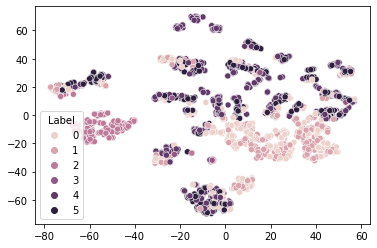

In [ ]:
sns.scatterplot(x=tsne_train[:,0],y=tsne_train[:,1],hue=y_train)

<AxesSubplot:>

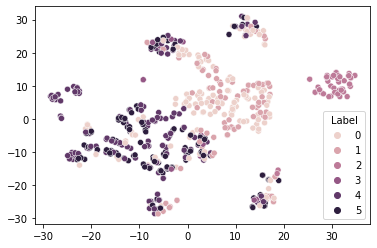

In [ ]:

sns.scatterplot(x=tsne_valid[:,0],y=tsne_valid[:,1],hue=y_validation)

<AxesSubplot:>

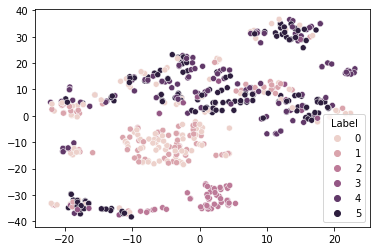

In [ ]:

sns.scatterplot(x=tsne_testing[:,0],y=tsne_testing[:,1],hue=y_test)

#second_question

#dimension_reduction

In [ ]:
#-----build_model------------
def build_model(no_epoch,batch_size,x_train,y_train,x_validation,y_validation):
  mlp_model = keras.Sequential()
  mlp_model.add(keras.layers.Flatten())
  mlp_model.add(keras.layers.Dense(10,activation = 'relu'))
  mlp_model.add(keras.layers.Dense(6,activation = 'softmax'))

  optimizer = tfa.optimizers.AdamW(
      learning_rate = 0.001,
      weight_decay = 0.0001
  )

  mlp_model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics='accuracy')
  results= mlp_model.fit(
    x=x_train,
    y=y_train,
    shuffle=True,
    epochs=no_epoch,
    validation_data = (x_validation,y_validation),
    batch_size=batch_size
  )
  return mlp_model,results
#-------pca---------------------------------
def pca_reduction(x_train,n=2):
  pca = PCA(n_components=n,random_state=0)
  pca_train=pca.fit_transform(x_train)
  return pca_train
#------evaluate_model------------------------
def evaluate_model(mlp_model,x_test,y_test):
  val_loss,val_acc=mlp_model.evaluate(x_test,y_test)
  return val_acc,val_loss


In [ ]:
Pca_accuracy=[]
pca_val_accuracy=[]
for i in range(2,19):
  
  # Accuracy_train=[]
  # Accuracy_validate=[]
  pca = PCA(n_components=i,random_state=0)
  pca_train=pca.fit_transform(x_train)
  pca_validation=pca.transform(x_validation)
  pca_test=pca.transform(x_test)

  mlp_model,results=build_model(100,64,pca_train,y_train,pca_validation,y_validation)
  pca_val_accuracy.append(results.history['val_accuracy'])
  # Accuracy_train.append(mlp_model.history['accuracy'])
  # Accuracy_validate.append(mlp_model.history['val_accuracy'])

  acc,loss=evaluate_model(mlp_model,pca_test,y_test)
  Pca_accuracy.append(acc)

Epoch 1/100
41/41 [==============================] - 1s 5ms/step - loss: 1.9112 - accuracy: 0.3196 - val_loss: 1.8170 - val_accuracy: 0.3422
Epoch 2/100
41/41 [==============================] - 0s 1ms/step - loss: 1.7650 - accuracy: 0.3452 - val_loss: 1.7156 - val_accuracy: 0.3333
Epoch 3/100
41/41 [==============================] - 0s 1ms/step - loss: 1.6611 - accuracy: 0.3944 - val_loss: 1.6358 - val_accuracy: 0.4242
Epoch 4/100
41/41 [==============================] - 0s 1ms/step - loss: 1.5796 - accuracy: 0.4437 - val_loss: 1.5709 - val_accuracy: 0.4171
Epoch 5/100
41/41 [==============================] - 0s 1ms/step - loss: 1.5142 - accuracy: 0.4372 - val_loss: 1.5130 - val_accuracy: 0.4153
Epoch 6/100
41/41 [==============================] - 0s 1ms/step - loss: 1.4564 - accuracy: 0.4273 - val_loss: 1.4620 - val_accuracy: 0.3886
Epoch 7/100
41/41 [==============================] - 0s 1ms/step - loss: 1.4070 - accuracy: 0.4208 - val_loss: 1.4174 - val_accuracy: 0.3797
Epoch 8/100
4

In [ ]:
Pca_accuracy

[0.554367184638977,
 0.625668466091156,
 0.6452763080596924,
 0.6916220784187317,
 0.686274528503418,
 0.7023172974586487,
 0.7130124568939209,
 0.7076649069786072,
 0.7165775299072266,
 0.7201426029205322,
 0.7237076759338379,
 0.7290552854537964,
 0.7165775299072266,
 0.7361853718757629,
 0.7557932138442993,
 0.7557932138442993,
 0.759358286857605]

In [ ]:
np.argmax(Pca_accuracy)
print(f'the best pca when using 17 feature with accuracy = {Pca_accuracy[np.argmax(Pca_accuracy)]}')

the best pca when using 17 feature with accuracy = 0.759358286857605


Text(0, 0.5, 'Accuracy')

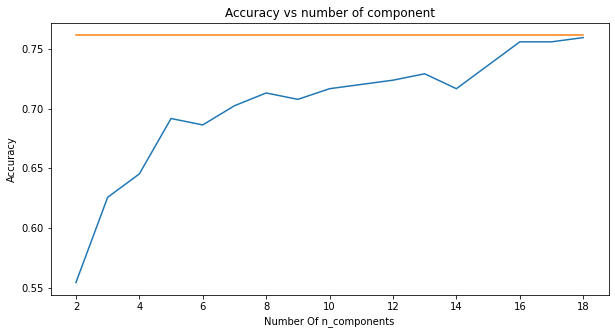

In [ ]:
#plot Accuracy vs number of component
plt.figure(figsize=(10,5))
sns.lineplot(x = range(2,19),y=Pca_accuracy)
sns.lineplot(x = range(2,19),y=np.average(test_accuracy))
plt.title("Accuracy vs number of component")
plt.xlabel("Number Of n_components")
plt.ylabel('Accuracy')


In [ ]:
#-------T-SNE AFTER REDUCTION-------------
pca = PCA(n_components=17,random_state=0)
pca_train=pca.fit_transform(x_train)
pca_validation=pca.fit_transform(x_validation)
pca_test=pca.transform(x_test)

# mlp_model=build_model(pca_train,y_train,pca_validation,y_validation)

# acc,loss=evaluate_model(mlp_model,pca_test,y_test)


#----TSNE_TRAINING---------
from sklearn.manifold import TSNE
tsne_train=TSNE(n_components=2,init='random',)
tsne_train=tsne_train.fit_transform(pca_train)
print(tsne_train.shape)
#(2619, 2)

#----TSNE_validation---------
from sklearn.manifold import TSNE
tsne_valid=TSNE(n_components=2,init='random',)
tsne_valid=tsne_valid.fit_transform(pca_validation)
print(tsne_valid.shape)
#(561, 2)

#----TSNE_Testing---------
from sklearn.manifold import TSNE
tsne_testing=TSNE(n_components=2,init='random',)
tsne_testing=tsne_testing.fit_transform(pca_test)
print(tsne_testing.shape)
#(561, 2)

c:\Users\hrelh\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(2619, 2)


c:\Users\hrelh\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(561, 2)


c:\Users\hrelh\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(561, 2)


<AxesSubplot:>

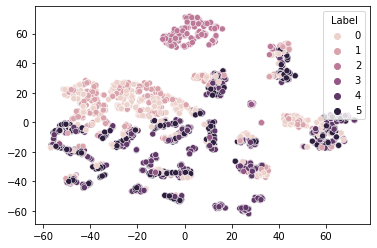

In [ ]:
sns.scatterplot(x=tsne_train[:,0],y=tsne_train[:,1],hue=y_train)

<AxesSubplot:>

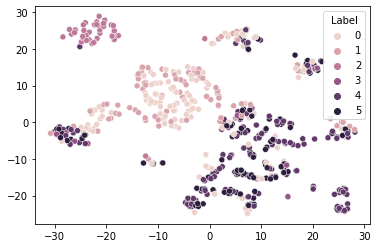

In [ ]:

sns.scatterplot(x=tsne_valid[:,0],y=tsne_valid[:,1],hue=y_validation)

<AxesSubplot:>

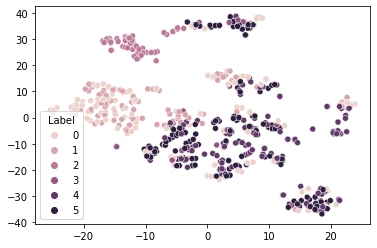

In [ ]:

sns.scatterplot(x=tsne_testing[:,0],y=tsne_testing[:,1],hue=y_test)

# Feature selection

In [ ]:
#-----mutual_information-----------
from sklearn.feature_selection import SelectKBest,mutual_info_classif
mutual_accuracy=[]
mutual_val_accuracy=[]
for i in range(2,19):
  
  fsm=SelectKBest(mutual_info_classif,k=i)
  fsm_train=fsm.fit_transform(x_train,y_train)
  fsm_val=fsm.fit_transform(x_validation,y_validation)
  fsm_test=fsm.transform(x_test)

  mlp_model,results=build_model(100,64,fsm_train,y_train,fsm_val,y_validation)
  mutual_val_accuracy.append(results.history['val_accuracy'])
  acc,loss=evaluate_model(mlp_model,fsm_test,y_test)
  mutual_accuracy.append(acc)

Epoch 1/100
41/41 [==============================] - 0s 5ms/step - loss: 1.9825 - accuracy: 0.1466 - val_loss: 1.8786 - val_accuracy: 0.2531
Epoch 2/100
41/41 [==============================] - 0s 1ms/step - loss: 1.8342 - accuracy: 0.3104 - val_loss: 1.7515 - val_accuracy: 0.3030
Epoch 3/100
41/41 [==============================] - 0s 1ms/step - loss: 1.7035 - accuracy: 0.3368 - val_loss: 1.6331 - val_accuracy: 0.3209
Epoch 4/100
41/41 [==============================] - 0s 1ms/step - loss: 1.5784 - accuracy: 0.3478 - val_loss: 1.5172 - val_accuracy: 0.3405
Epoch 5/100
41/41 [==============================] - 0s 1ms/step - loss: 1.4563 - accuracy: 0.3654 - val_loss: 1.4047 - val_accuracy: 0.3708
Epoch 6/100
41/41 [==============================] - 0s 1ms/step - loss: 1.3431 - accuracy: 0.4544 - val_loss: 1.2995 - val_accuracy: 0.4528
Epoch 7/100
41/41 [==============================] - 0s 1ms/step - loss: 1.2426 - accuracy: 0.4830 - val_loss: 1.2093 - val_accuracy: 0.4635
Epoch 8/100
4

In [ ]:
mutual_accuracy

[0.6951871514320374,
 0.7023172974586487,
 0.6951871514320374,
 0.6934046149253845,
 0.6827094554901123,
 0.70944744348526,
 0.675579309463501,
 0.6791443824768066,
 0.6541889309883118,
 0.6363636255264282,
 0.6203208565711975,
 0.7076649069786072,
 0.7040998339653015,
 0.7183600664138794,
 0.7201426029205322,
 0.7023172974586487,
 0.22281639277935028]

Text(0, 0.5, 'Accuracy')

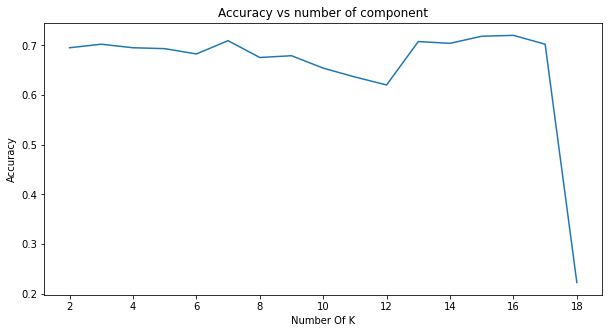

In [ ]:
#plot Accuracy vs number of component
plt.figure(figsize=(10,5))
sns.lineplot(x = range(2,19),y=mutual_accuracy)
plt.title("Accuracy vs number of component")
plt.xlabel("Number Of K")
plt.ylabel('Accuracy')

In [ ]:
fsm=SelectKBest(mutual_info_classif,k=15)
fsm.fit_transform(x_train,y_train)

array([[-0.31856254, -0.70978461, -0.33553717, ..., -0.10986759,
        -0.41640765, -0.41616376],
       [-0.31988928, -0.70967715, -0.71589647, ..., -0.1086599 ,
        -0.4155654 , -0.41548233],
       [-0.29121895,  0.32192611,  1.333552  , ..., -0.10503681,
         3.75920097,  3.75920582],
       ...,
       [-0.31620032, -0.53790819, -0.71656668, ..., -0.10503681,
        -0.40849729, -0.40840572],
       [-0.30938869, -0.36586654,  0.04660094, ..., -0.1074522 ,
        -0.40680433, -0.406772  ],
       [-0.31362775, -0.53753359, -0.33542854, ..., -0.1074522 ,
        -0.41316986, -0.41306985]])

In [ ]:
mutal_features = fsm.get_feature_names_out()
mutal_features_df = pd.DataFrame(mutal_features,columns=['Mutal Information Features'])
mutal_features_df

Mutal Information Features
0            Received Packets
1              Received Bytes
2                  Sent Bytes
3                Sent Packets
4     Port alive Duration (S)
5      Delta Received Packets
6        Delta Received Bytes
7            Delta Sent Bytes
8          Delta Sent Packets
9           Total Load/Latest
10          Unknown Load/Rate
11        Unknown Load/Latest
12        Active Flow Entries
13          Packets Looked Up
14            Packets Matched

In [ ]:
np.argmax(mutual_accuracy)
print(f'the best no_features when using 15 feature with accuracy = {mutual_accuracy[np.argmax(mutual_accuracy)]}')

the best no_features when using 15 feature with accuracy = 0.7201426029205322


In [ ]:
#-----ANOVA-----------
Anova_accuracy=[]
annova_val_accuracy=[]
for i in range(2,19):
  selector = SelectKBest(f_classif, k=i)
  annova_train=selector.fit_transform(x_train, y_train)
  annova_val=selector.fit_transform(x_validation,y_validation)
  annova_test=selector.transform(x_test)

  mlp_model,results=build_model(100,64,annova_train,y_train,annova_val,y_validation)
  annova_val_accuracy.append(results.history['val_accuracy'])
  acc,loss=evaluate_model(mlp_model,annova_test,y_test)
  Anova_accuracy.append(acc)

Epoch 1/100
41/41 [==============================] - 0s 4ms/step - loss: 1.9060 - accuracy: 0.2264 - val_loss: 1.7854 - val_accuracy: 0.2923
Epoch 2/100
41/41 [==============================] - 0s 1ms/step - loss: 1.7620 - accuracy: 0.2493 - val_loss: 1.6762 - val_accuracy: 0.3119
Epoch 3/100
41/41 [==============================] - 0s 2ms/step - loss: 1.6431 - accuracy: 0.2619 - val_loss: 1.5871 - val_accuracy: 0.3084
Epoch 4/100
41/41 [==============================] - 0s 1ms/step - loss: 1.5468 - accuracy: 0.3654 - val_loss: 1.5133 - val_accuracy: 0.4082
Epoch 5/100
41/41 [==============================] - 0s 2ms/step - loss: 1.4724 - accuracy: 0.4318 - val_loss: 1.4578 - val_accuracy: 0.4100
Epoch 6/100
41/41 [==============================] - 0s 1ms/step - loss: 1.4197 - accuracy: 0.4307 - val_loss: 1.4181 - val_accuracy: 0.4153
Epoch 7/100
41/41 [==============================] - 0s 1ms/step - loss: 1.3844 - accuracy: 0.4334 - val_loss: 1.3900 - val_accuracy: 0.4171
Epoch 8/100
4

In [ ]:
Anova_accuracy

[0.5775400996208191,
 0.5597147941589355,
 0.7040998339653015,
 0.7112299203872681,
 0.7076649069786072,
 0.70944744348526,
 0.4955436587333679,
 0.7415329813957214,
 0.7415329813957214,
 0.7557932138442993,
 0.22281639277935028,
 0.2192513346672058,
 0.5971479415893555,
 0.7450980544090271,
 0.22638146579265594,
 0.26737967133522034,
 0.2442067712545395]

In [ ]:
np.argmax(Anova_accuracy)
print(f'the best no_features when using 11 feature with accuracy = {Anova_accuracy[np.argmax(Anova_accuracy)]}')

the best no_features when using 11 feature with accuracy = 0.7557932138442993


Text(0, 0.5, 'Accuracy')

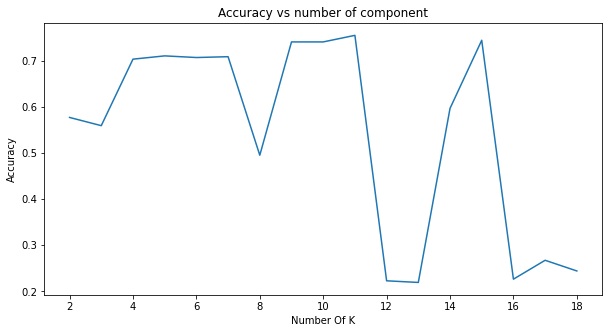

In [ ]:
#plot Accuracy vs number of component
plt.figure(figsize=(10,5))
sns.lineplot(x = range(2,19),y=Anova_accuracy)
plt.title("Accuracy vs number of component")
plt.xlabel("Number Of K")
plt.ylabel('Accuracy')

In [ ]:
anova_features = selector.get_feature_names_out()
anova_features_df = pd.DataFrame(anova_features,columns=['Anova Features'])
anova_features_df

Anova Features
0                       Switch ID
1                     Port Number
2                Received Packets
3                  Received Bytes
4                      Sent Bytes
5                    Sent Packets
6         Port alive Duration (S)
7          Delta Received Packets
8            Delta Received Bytes
9                Delta Sent Bytes
10             Delta Sent Packets
11  Delta Port alive Duration (S)
12               Connection Point
13              Total Load/Latest
14            Unknown Load/Latest
15            Active Flow Entries
16              Packets Looked Up
17                Packets Matched

In [ ]:
#compare Accuracy between Anova and Mutal Information 
Techniques = ['Anova','Mutal Information']
Accuracy = [ Anova_accuracy[np.argmax(Anova_accuracy)],mutual_accuracy[np.argmax(mutual_accuracy)]]
#Accuracy =[0.7468805909156799,0.7112299203872681]
express.bar(x = Techniques, y = Accuracy, color=Accuracy , title="Comparision between Anova and Mutal Information ",labels={'x':'Techniques','y':'Accuracy'})

In [ ]:
# so, anova is the best feature selection so, i will draw T-sne of anova feature 
selector = SelectKBest(f_classif, k=11)
annova_train=selector.fit_transform(x_train, y_train)
annova_val=selector.fit_transform(x_validation,y_validation)
annova_test=selector.transform(x_test)

#----TSNE_TRAINING---------
from sklearn.manifold import TSNE
tsne_train=TSNE(n_components=2,init='random',)
tsne_train=tsne_train.fit_transform(annova_train)
print(tsne_train.shape)
#(2619, 2)

#----TSNE_validation---------
from sklearn.manifold import TSNE
tsne_valid=TSNE(n_components=2,init='random',)
tsne_valid=tsne_valid.fit_transform(annova_val)
print(tsne_valid.shape)
#(561, 2)

#----TSNE_Testing---------
from sklearn.manifold import TSNE
tsne_testing=TSNE(n_components=2,init='random',)
tsne_testing=tsne_testing.fit_transform(annova_test)
print(tsne_testing.shape)
#(561, 2)



c:\Users\hrelh\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



(2619, 2)


c:\Users\hrelh\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



(561, 2)


c:\Users\hrelh\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



(561, 2)


<AxesSubplot:>

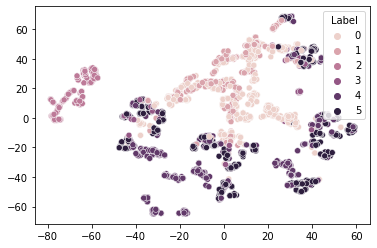

In [ ]:
sns.scatterplot(x=tsne_train[:,0],y=tsne_train[:,1],hue=y_train)

<AxesSubplot:>

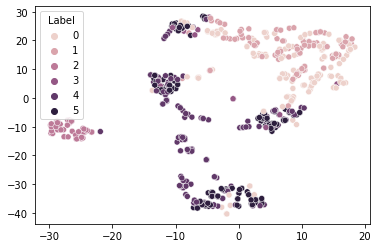

In [ ]:
sns.scatterplot(x=tsne_valid[:,0],y=tsne_valid[:,1],hue=y_validation)


<AxesSubplot:>

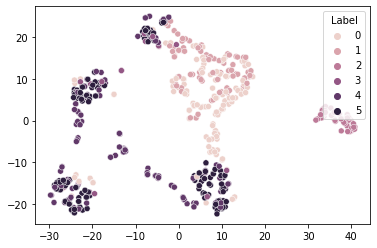

In [ ]:
sns.scatterplot(x=tsne_testing[:,0],y=tsne_testing[:,1],hue=y_test)

In [ ]:
#-------update data
Techniques = [ 'Dimensionality Reduction','Mutal Information','Anova',]
#Accuracy = [Pca_accuracy, mutual_accuracy ,Anova_accuracy]
Accuracy =[np.argmax(annova_val_accuracy),np.argmax(mutual_val_accuracy),np.argmax(pca_val_accuracy)]
express.bar(x = Techniques, y = Accuracy, color=Accuracy , title="Comparision between Anova and Mutal Information and Dimensionality Reduction",labels={
    'x':'Techniques',
    'y':'Accuracy',
})

In [ ]:
#anova is the hieghest accuracy so update data based on it
cols = selector.get_support(indices=True)
cols = cols.tolist()
cols

[2, 3, 4, 5, 6, 7, 10, 12, 18, 19, 20]

In [ ]:
x_train_new = x_train.iloc[:,cols]
x_validation_new = x_validation.iloc[:,cols]
x_test_new = x_test.iloc[:,cols]

In [ ]:
#----build model-------
mlp_model,results=build_model(100,64,x_train_new,y_train,x_validation_new,y_validation)
#------predict model------
predicted=mlp_model.predict(x_test_new)
#------evaluate model---------
val_loss,val_acc=mlp_model.evaluate(x_test_new,y_test)

Epoch 1/100
41/41 [==============================] - 1s 4ms/step - loss: 1.9620 - accuracy: 0.1199 - val_loss: 1.8394 - val_accuracy: 0.2050
Epoch 2/100
41/41 [==============================] - 0s 1ms/step - loss: 1.7667 - accuracy: 0.2658 - val_loss: 1.6754 - val_accuracy: 0.3993
Epoch 3/100
41/41 [==============================] - 0s 1ms/step - loss: 1.6210 - accuracy: 0.4028 - val_loss: 1.5377 - val_accuracy: 0.4599
Epoch 4/100
41/41 [==============================] - 0s 1ms/step - loss: 1.4892 - accuracy: 0.4559 - val_loss: 1.4096 - val_accuracy: 0.5134
Epoch 5/100
41/41 [==============================] - 0s 1ms/step - loss: 1.3589 - accuracy: 0.4948 - val_loss: 1.2874 - val_accuracy: 0.5312
Epoch 6/100
41/41 [==============================] - 0s 1ms/step - loss: 1.2439 - accuracy: 0.5151 - val_loss: 1.1808 - val_accuracy: 0.5312
Epoch 7/100
41/41 [==============================] - 0s 1ms/step - loss: 1.1473 - accuracy: 0.5273 - val_loss: 1.0927 - val_accuracy: 0.5348
Epoch 8/100
4

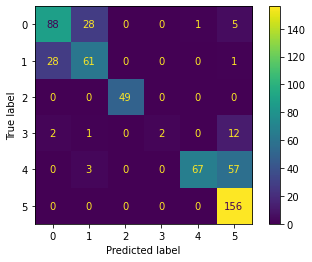

In [ ]:
#------confusion_matrixDisplay----------
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
trans_pred=transform_pred(predicted)
cm = confusion_matrix(y_test, trans_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


#third_question

#3.1

#Batch size= 32

In [ ]:
from numpy.ma.core import append
train_accuracy1=[]
val_accuracy1=[]
test_accuracy1=[]
for i in range(0,5):
  #----build model-------
  mlp_model,results=build_model(100,32,x_train_new,y_train,x_validation_new,y_validation)
  #------predict model------
  predicted=mlp_model.predict(x_test_new)
  #------evaluate model---------
  loss,acc=mlp_model.evaluate(x_test_new,y_test)
  train_accuracy1.append(results.history['accuracy'])
  val_accuracy1.append(results.history['val_accuracy'])
  test_accuracy1.append(acc)

  

Epoch 1/100
82/82 [==============================] - 1s 2ms/step - loss: 1.7399 - accuracy: 0.2971 - val_loss: 1.5470 - val_accuracy: 0.3957
Epoch 2/100
82/82 [==============================] - 0s 1ms/step - loss: 1.4497 - accuracy: 0.4322 - val_loss: 1.3151 - val_accuracy: 0.4545
Epoch 3/100
82/82 [==============================] - 0s 1ms/step - loss: 1.2566 - accuracy: 0.4483 - val_loss: 1.1543 - val_accuracy: 0.5116
Epoch 4/100
82/82 [==============================] - 0s 1ms/step - loss: 1.1065 - accuracy: 0.5334 - val_loss: 1.0257 - val_accuracy: 0.5900
Epoch 5/100
82/82 [==============================] - 0s 1ms/step - loss: 0.9972 - accuracy: 0.5834 - val_loss: 0.9407 - val_accuracy: 0.6043
Epoch 6/100
82/82 [==============================] - 0s 1ms/step - loss: 0.9301 - accuracy: 0.6094 - val_loss: 0.8856 - val_accuracy: 0.6275
Epoch 7/100
82/82 [==============================] - 0s 1ms/step - loss: 0.8860 - accuracy: 0.6273 - val_loss: 0.8460 - val_accuracy: 0.6453
Epoch 8/100
8

In [ ]:
test_accuracy1

[0.7629233598709106,
 0.7700534462928772,
 0.7771835923194885,
 0.7611408233642578,
 0.7629233598709106]

In [ ]:
print(f'minimum_test_accuracy = {np.min(test_accuracy1)}')
print(f'averge_test_accuracy = {np.average(test_accuracy1)}')
print(f'maximun_test_accuracy = {np.max(test_accuracy1)}')

minimum_test_accuracy = 0.7611408233642578
averge_test_accuracy = 0.766844916343689
maximun_test_accuracy = 0.7771835923194885


In [ ]:
train_accuracy1

[[0.29705995321273804,
  0.4322260320186615,
  0.44826269149780273,
  0.5334097146987915,
  0.5834288001060486,
  0.6093928813934326,
  0.627338707447052,
  0.6365025043487549,
  0.6613211035728455,
  0.6804123520851135,
  0.684230625629425,
  0.6953035593032837,
  0.6979763507843018,
  0.6968308687210083,
  0.6995036005973816,
  0.7014127373695374,
  0.6991217732429504,
  0.7059946656227112,
  0.7071401476860046,
  0.7075219750404358,
  0.7082856297492981,
  0.7105765342712402,
  0.7121038436889648,
  0.7109583616256714,
  0.712485671043396,
  0.7143948078155518,
  0.7143948078155518,
  0.7140129804611206,
  0.7143948078155518,
  0.7166857719421387,
  0.7170675992965698,
  0.7170675992965698,
  0.7178312540054321,
  0.7185949087142944,
  0.7193585634231567,
  0.7201221585273743,
  0.7212676405906677,
  0.7212676405906677,
  0.7205039858818054,
  0.7208858132362366,
  0.7235586047172546,
  0.7227949500083923,
  0.7205039858818054,
  0.7205039858818054,
  0.7205039858818054,
  0.7243222

In [ ]:
print(f'minimum_train_accuracy = {np.min(train_accuracy1)}')
print(f'average_train_accuracy = {np.average(train_accuracy1)}')
print(f'maximun_train_accuracy = {np.max(train_accuracy1)}')

minimum_train_accuracy = 0.27911415696144104
average_train_accuracy = 0.717818251132965
maximun_train_accuracy = 0.7667048573493958


In [ ]:
np.average(val_accuracy1)

0.7208734409809112

#Batch_size=64

In [ ]:
from numpy.ma.core import append
train_accuracy2=[]
val_accuracy2=[]
test_accuracy2=[]
for i in range(0,5):
  #----build model-------
  mlp_model,results=build_model(100,64,x_train_new,y_train,x_validation_new,y_validation)
  #------predict model------
  predicted=mlp_model.predict(x_test_new)
  #------evaluate model---------
  loss,acc=mlp_model.evaluate(x_test_new,y_test)
  train_accuracy2.append(results.history['accuracy'])
  val_accuracy2.append(results.history['val_accuracy'])
  test_accuracy2.append(acc)

Epoch 1/100
41/41 [==============================] - 0s 4ms/step - loss: 1.6327 - accuracy: 0.3792 - val_loss: 1.5966 - val_accuracy: 0.4207
Epoch 2/100
41/41 [==============================] - 0s 1ms/step - loss: 1.4636 - accuracy: 0.4609 - val_loss: 1.4484 - val_accuracy: 0.4563
Epoch 3/100
41/41 [==============================] - 0s 2ms/step - loss: 1.3401 - accuracy: 0.4842 - val_loss: 1.3363 - val_accuracy: 0.4813
Epoch 4/100
41/41 [==============================] - 0s 2ms/step - loss: 1.2473 - accuracy: 0.4968 - val_loss: 1.2487 - val_accuracy: 0.4902
Epoch 5/100
41/41 [==============================] - 0s 1ms/step - loss: 1.1763 - accuracy: 0.5052 - val_loss: 1.1800 - val_accuracy: 0.4955
Epoch 6/100
41/41 [==============================] - 0s 1ms/step - loss: 1.1205 - accuracy: 0.5132 - val_loss: 1.1236 - val_accuracy: 0.5134
Epoch 7/100
41/41 [==============================] - 0s 1ms/step - loss: 1.0747 - accuracy: 0.5342 - val_loss: 1.0755 - val_accuracy: 0.5330
Epoch 8/100
4

In [ ]:
test_accuracy2

[0.7504456043243408,
 0.7664884328842163,
 0.7700534462928772,
 0.7522281408309937,
 0.7647058963775635]

In [ ]:
print(f'minimum_test_accuracy = {np.min(test_accuracy2)}')
print(f'average_test_accuracy = {np.average(test_accuracy2)}')
print(f'maximun_test_accuracy = {np.max(test_accuracy2)}')

minimum_test_accuracy = 0.7504456043243408
average_test_accuracy = 0.7607843041419983
maximun_test_accuracy = 0.7700534462928772


In [ ]:
train_accuracy2

[[0.3791523575782776,
  0.460862934589386,
  0.48415425419807434,
  0.4967544972896576,
  0.5051546096801758,
  0.51317298412323,
  0.5341733694076538,
  0.5502099990844727,
  0.5853379368782043,
  0.600992739200592,
  0.6170294284820557,
  0.6246659159660339,
  0.6231386065483093,
  0.631920576095581,
  0.6422298550605774,
  0.6517754793167114,
  0.6590301394462585,
  0.6613211035728455,
  0.665139377117157,
  0.6636120676994324,
  0.6716303825378418,
  0.6777396202087402,
  0.6792668700218201,
  0.6838487982749939,
  0.6853761076927185,
  0.6888124942779541,
  0.6926307678222656,
  0.6945399045944214,
  0.6995036005973816,
  0.6975945234298706,
  0.7048491835594177,
  0.7063764929771423,
  0.7048491835594177,
  0.7105765342712402,
  0.7086674571037292,
  0.7121038436889648,
  0.7140129804611206,
  0.712485671043396,
  0.7132493257522583,
  0.7163039445877075,
  0.7182130813598633,
  0.7163039445877075,
  0.7201221585273743,
  0.7197403311729431,
  0.7216494679450989,
  0.721649467945

In [ ]:
print(f'minimum_train_accuracy = {np.min(train_accuracy2)}')
print(f'average_train_accuracy = {np.average(train_accuracy2)}')
print(f'maximun_traint_accuracy = {np.max(train_accuracy2)}')

minimum_train_accuracy = 0.15158458054065704
average_train_accuracy = 0.7003558606207371
maximun_traint_accuracy = 0.7575410604476929


In [ ]:
np.average(val_accuracy2)

0.7085383244752884

#Batch_size=128

In [ ]:
from numpy.ma.core import append
train_accuracy3=[]
val_accuracy3=[]
test_accuracy3=[]
for i in range(0,5):
  #----build model-------
  mlp_model,results=build_model(100,128,x_train_new,y_train,x_validation_new,y_validation)
  #------predict model------
  predicted=mlp_model.predict(x_test_new)
  #------evaluate model---------
  loss,acc=mlp_model.evaluate(x_test_new,y_test)
  train_accuracy3.append(results.history['accuracy'])
  val_accuracy3.append(results.history['val_accuracy'])
  test_accuracy3.append(acc)

Epoch 1/100
21/21 [==============================] - 0s 8ms/step - loss: 1.7490 - accuracy: 0.2081 - val_loss: 1.6990 - val_accuracy: 0.2175
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 1.6322 - accuracy: 0.2692 - val_loss: 1.5901 - val_accuracy: 0.2923
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 1.5360 - accuracy: 0.3391 - val_loss: 1.4978 - val_accuracy: 0.3761
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 1.4550 - accuracy: 0.3960 - val_loss: 1.4193 - val_accuracy: 0.4296
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 1.3855 - accuracy: 0.4338 - val_loss: 1.3504 - val_accuracy: 0.4528
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 1.3229 - accuracy: 0.4513 - val_loss: 1.2884 - val_accuracy: 0.4652
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 1.2659 - accuracy: 0.4662 - val_loss: 1.2312 - val_accuracy: 0.4581
Epoch 8/100
2

In [ ]:
test_accuracy3

[0.7540106773376465,
 0.759358286857605,
 0.7415329813957214,
 0.7557932138442993,
 0.7433155179023743]

In [ ]:
print(f'minimum_test_accuracy = {np.min(test_accuracy3)}')
print(f'average_test_accuracy = {np.average(test_accuracy3)}')
print(f'maximun_test_accuracy = {np.max(test_accuracy3)}')

minimum_test_accuracy = 0.7415329813957214
average_test_accuracy = 0.7508021354675293
maximun_test_accuracy = 0.759358286857605


In [ ]:
train_accuracy3

[[0.20809468626976013,
  0.26918670535087585,
  0.3390607237815857,
  0.39595264196395874,
  0.4337533414363861,
  0.45131731033325195,
  0.46620848774909973,
  0.501336395740509,
  0.5349370241165161,
  0.5593737959861755,
  0.591447114944458,
  0.6185566782951355,
  0.6239022612571716,
  0.6311569213867188,
  0.6384115815162659,
  0.6410843729972839,
  0.6452844738960266,
  0.648339033126831,
  0.6513936519622803,
  0.6536846160888672,
  0.6559755802154541,
  0.6575028896331787,
  0.6609392762184143,
  0.6662848591804504,
  0.6674303412437439,
  0.6666666865348816,
  0.669721245765686,
  0.6727758646011353,
  0.6758304834365845,
  0.6765941381454468,
  0.6773577928543091,
  0.6800305247306824,
  0.6819396615028381,
  0.6838487982749939,
  0.6846124529838562,
  0.6838487982749939,
  0.6888124942779541,
  0.6907216310501099,
  0.6899579763412476,
  0.6880488991737366,
  0.6922489404678345,
  0.6926307678222656,
  0.6914852857589722,
  0.6953035593032837,
  0.6945399045944214,
  0.69759

In [ ]:
print(f'minimum_train_accuracy = {np.min(train_accuracy3)}')
print(f'average_train_accuracy = {np.average(train_accuracy3)}')
print(f'maximun_train_accuracy = {np.max(train_accuracy3)}')

minimum_train_accuracy = 0.016036655753850937
average_train_accuracy = 0.6627766321934759
maximun_train_accuracy = 0.7346315383911133


In [ ]:
np.average(val_accuracy3)

0.6673119427077472

In [ ]:
compare_training=[
  np.average(train_accuracy1),
  np.average(train_accuracy2),
  np.average(train_accuracy3)
]
compare_testing=[
  np.average(test_accuracy1),
  np.average(test_accuracy2),
  np.average(test_accuracy3)
]
print(compare_training)
print(compare_testing)
print('the best is batch_size 32')

[0.717818251132965, 0.7003558606207371, 0.6627766321934759]
[0.766844916343689, 0.7607843041419983, 0.7508021354675293]
the best is batch_size 32


#3.2

In [ ]:
#-----compared_validation------
print(np.max([np.average(val_accuracy1),np.average(val_accuracy2),np.average(val_accuracy3)]))
print(np.argmax([np.average(val_accuracy1),np.average(val_accuracy2),np.average(val_accuracy3)]))
#so, we will complete with Batch 32

0.7208734409809112
0


In [ ]:
def build_model_hidden(no_hidden,no_neurons,no_epoch,batch_size,x_train,y_train,x_validation,y_validation):
  mlp_model = keras.Sequential()
  mlp_model.add(keras.layers.Flatten())

  if(no_hidden==1):
   mlp_model.add(keras.layers.Dense(no_neurons,activation = 'relu'))
  elif(no_hidden == 2):
   mlp_model.add(keras.layers.Dense(no_neurons,activation = 'relu'))
   mlp_model.add(keras.layers.Dense(no_neurons,activation = 'relu'))
  elif(no_hidden == 4):
   mlp_model.add(keras.layers.Dense(no_neurons,activation = 'relu'))
   mlp_model.add(keras.layers.Dense(no_neurons,activation = 'relu'))
   mlp_model.add(keras.layers.Dense(no_neurons,activation = 'relu'))
   mlp_model.add(keras.layers.Dense(no_neurons,activation = 'relu'))
  else:
   mlp_model.add(keras.layers.Dense(no_neurons,activation = 'relu'))
   mlp_model.add(keras.layers.Dense(no_neurons,activation = 'relu'))
   mlp_model.add(keras.layers.Dense(no_neurons,activation = 'relu'))
   mlp_model.add(keras.layers.Dense(no_neurons,activation = 'relu'))
   mlp_model.add(keras.layers.Dense(no_neurons,activation = 'relu'))
   mlp_model.add(keras.layers.Dense(no_neurons,activation = 'relu'))
   mlp_model.add(keras.layers.Dense(no_neurons,activation = 'relu'))
   mlp_model.add(keras.layers.Dense(no_neurons,activation = 'relu'))

  mlp_model.add(keras.layers.Dense(6,activation = 'softmax'))

  optimizer = tfa.optimizers.AdamW(
      learning_rate = 0.001,
      weight_decay = 0.0001
  )

  mlp_model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics='accuracy')
  results= mlp_model.fit(
    x=x_train,
    y=y_train,
    shuffle=True,
    epochs=no_epoch,
    validation_data = (x_validation,y_validation),
    batch_size=batch_size
  )
  return mlp_model,results
#------evaluate_model------------------------
def evaluate_model(mlp_model,x_test,y_test):
  val_loss,val_acc=mlp_model.evaluate(x_test,y_test)
  return val_acc,val_loss
#-------show_static---------------------
def show_static(acuuracy_list,state):
  print(f'min_of {state} = {np.min(acuuracy_list)}')
  print(f'average_of {state} = {np.average(acuuracy_list)}')
  print(f'maximum_of {state} = {np.max(acuuracy_list)}')

#one_hidden_layer & 10 nuerons

In [ ]:
train_accuracy_1_10=[]
val_accuracy_1_10=[]
test_accuracy_1_10=[]
for i in range(0,5):
  #----build model-------
  mlp_model,results=build_model_hidden(1,10,100,32,x_train_new,y_train,x_validation_new,y_validation)
  #------predict model------
  predicted=mlp_model.predict(x_test_new)
  #------evaluate model---------
  loss,acc=mlp_model.evaluate(x_test_new,y_test)
  train_accuracy_1_10.append(results.history['accuracy'])
  val_accuracy_1_10.append(results.history['val_accuracy'])
  test_accuracy_1_10.append(acc)

Epoch 1/100
82/82 [==============================] - 1s 2ms/step - loss: 1.7225 - accuracy: 0.1588 - val_loss: 1.5536 - val_accuracy: 0.3369
Epoch 2/100
82/82 [==============================] - 0s 1ms/step - loss: 1.4056 - accuracy: 0.5116 - val_loss: 1.2944 - val_accuracy: 0.5704
Epoch 3/100
82/82 [==============================] - 0s 1ms/step - loss: 1.1830 - accuracy: 0.5949 - val_loss: 1.1033 - val_accuracy: 0.6168
Epoch 4/100
82/82 [==============================] - 0s 1ms/step - loss: 1.0305 - accuracy: 0.6266 - val_loss: 0.9759 - val_accuracy: 0.6453
Epoch 5/100
82/82 [==============================] - 0s 1ms/step - loss: 0.9359 - accuracy: 0.6575 - val_loss: 0.8947 - val_accuracy: 0.6720
Epoch 6/100
82/82 [==============================] - 0s 1ms/step - loss: 0.8779 - accuracy: 0.6716 - val_loss: 0.8427 - val_accuracy: 0.6881
Epoch 7/100
82/82 [==============================] - 0s 1ms/step - loss: 0.8398 - accuracy: 0.6877 - val_loss: 0.8075 - val_accuracy: 0.6970
Epoch 8/100
8

In [ ]:

show_static(train_accuracy_1_10,'training')
print("---------------------------------------")
show_static(val_accuracy_1_10,'validation')
print("---------------------------------------")
show_static(test_accuracy_1_10,'testing')

min_of training = 0.15883925557136536
average_of training = 0.7169156182408333
maximum_of training = 0.7533409595489502
---------------------------------------
min_of validation = 0.3368983864784241
average_of validation = 0.7172156856060028
maximum_of validation = 0.7611408233642578
---------------------------------------
min_of testing = 0.759358286857605
average_of testing = 0.7679144382476807
maximum_of testing = 0.7736185193061829


#one_hidden_layer & 20 nuerons

In [ ]:
train_accuracy_1_20=[]
val_accuracy_1_20=[]
test_accuracy_1_20=[]
for i in range(0,5):
  #----build model-------
  mlp_model,results=build_model_hidden(1,20,100,32,x_train_new,y_train,x_validation_new,y_validation)
  #------predict model------
  predicted=mlp_model.predict(x_test_new)
  #------evaluate model---------
  loss,acc=mlp_model.evaluate(x_test_new,y_test)
  train_accuracy_1_20.append(results.history['accuracy'])
  val_accuracy_1_20.append(results.history['val_accuracy'])
  test_accuracy_1_20.append(acc)

Epoch 1/100
82/82 [==============================] - 1s 3ms/step - loss: 1.5168 - accuracy: 0.3853 - val_loss: 1.2982 - val_accuracy: 0.5009
Epoch 2/100
82/82 [==============================] - 0s 1ms/step - loss: 1.1881 - accuracy: 0.5158 - val_loss: 1.0646 - val_accuracy: 0.5793
Epoch 3/100
82/82 [==============================] - 0s 1ms/step - loss: 1.0125 - accuracy: 0.5777 - val_loss: 0.9335 - val_accuracy: 0.6488
Epoch 4/100
82/82 [==============================] - 0s 1ms/step - loss: 0.9143 - accuracy: 0.6380 - val_loss: 0.8565 - val_accuracy: 0.6774
Epoch 5/100
82/82 [==============================] - 0s 1ms/step - loss: 0.8557 - accuracy: 0.6602 - val_loss: 0.8110 - val_accuracy: 0.6916
Epoch 6/100
82/82 [==============================] - 0s 1ms/step - loss: 0.8172 - accuracy: 0.6728 - val_loss: 0.7768 - val_accuracy: 0.7059
Epoch 7/100
82/82 [==============================] - 0s 1ms/step - loss: 0.7899 - accuracy: 0.6808 - val_loss: 0.7532 - val_accuracy: 0.7130
Epoch 8/100
8

In [ ]:
show_static(train_accuracy_1_20,'training')
print("---------------------------------------")
show_static(val_accuracy_1_20,'validation')
print("---------------------------------------")
show_static(test_accuracy_1_20,'testing')

min_of training = 0.11989308893680573
average_of training = 0.7380267263352871
maximum_of training = 0.7758686542510986
---------------------------------------
min_of validation = 0.37254902720451355
average_of validation = 0.7439643470644951
maximum_of validation = 0.7843137383460999
---------------------------------------
min_of testing = 0.7736185193061829
average_of testing = 0.7821746826171875
maximum_of testing = 0.7914438247680664


#one_hidden_layer & 30 nuerons

In [ ]:
train_accuracy_1_30=[]
val_accuracy_1_30=[]
test_accuracy_1_30=[]
for i in range(0,5):
  #----build model-------
  mlp_model,results=build_model_hidden(1,30,100,32,x_train_new,y_train,x_validation_new,y_validation)
  #------predict model------
  predicted=mlp_model.predict(x_test_new)
  #------evaluate model---------
  loss,acc=mlp_model.evaluate(x_test_new,y_test)
  train_accuracy_1_30.append(results.history['accuracy'])
  val_accuracy_1_30.append(results.history['val_accuracy'])
  test_accuracy_1_30.append(acc)

Epoch 1/100
82/82 [==============================] - 1s 3ms/step - loss: 1.7260 - accuracy: 0.3131 - val_loss: 1.4048 - val_accuracy: 0.4367
Epoch 2/100
82/82 [==============================] - 0s 1ms/step - loss: 1.2014 - accuracy: 0.5288 - val_loss: 1.0833 - val_accuracy: 0.5686
Epoch 3/100
82/82 [==============================] - 0s 1ms/step - loss: 1.0002 - accuracy: 0.5953 - val_loss: 0.9347 - val_accuracy: 0.6453
Epoch 4/100
82/82 [==============================] - 0s 1ms/step - loss: 0.9012 - accuracy: 0.6449 - val_loss: 0.8482 - val_accuracy: 0.6845
Epoch 5/100
82/82 [==============================] - 0s 1ms/step - loss: 0.8407 - accuracy: 0.6659 - val_loss: 0.7950 - val_accuracy: 0.6988
Epoch 6/100
82/82 [==============================] - 0s 1ms/step - loss: 0.8005 - accuracy: 0.6850 - val_loss: 0.7577 - val_accuracy: 0.7166
Epoch 7/100
82/82 [==============================] - 0s 1ms/step - loss: 0.7724 - accuracy: 0.6984 - val_loss: 0.7328 - val_accuracy: 0.7255
Epoch 8/100
8

In [ ]:
show_static(train_accuracy_1_30,'training')
print("---------------------------------------")
show_static(val_accuracy_1_30,'validation')
print("---------------------------------------")
show_static(test_accuracy_1_30,'testing')

min_of training = 0.3130966126918793
average_of training = 0.74760137540102
maximum_of training = 0.7789232730865479
---------------------------------------
min_of validation = 0.4367201328277588
average_of validation = 0.7495080198049545
maximum_of validation = 0.7843137383460999
---------------------------------------
min_of testing = 0.7611408233642578
average_of testing = 0.776827085018158
maximum_of testing = 0.7914438247680664


#one_hidden_layer & 40 nuerons

In [ ]:
train_accuracy_1_40=[]
val_accuracy_1_40=[]
test_accuracy_1_40=[]
for i in range(0,5):
  #----build model-------
  mlp_model,results=build_model_hidden(1,40,100,32,x_train_new,y_train,x_validation_new,y_validation)
  #------predict model------
  predicted=mlp_model.predict(x_test_new)
  #------evaluate model---------
  loss,acc=mlp_model.evaluate(x_test_new,y_test)
  train_accuracy_1_40.append(results.history['accuracy'])
  val_accuracy_1_40.append(results.history['val_accuracy'])
  test_accuracy_1_40.append(acc)

Epoch 1/100
82/82 [==============================] - 1s 2ms/step - loss: 1.3618 - accuracy: 0.4968 - val_loss: 1.1262 - val_accuracy: 0.5882
Epoch 2/100
82/82 [==============================] - 0s 1ms/step - loss: 1.0044 - accuracy: 0.6155 - val_loss: 0.9225 - val_accuracy: 0.6488
Epoch 3/100
82/82 [==============================] - 0s 1ms/step - loss: 0.8720 - accuracy: 0.6586 - val_loss: 0.8269 - val_accuracy: 0.6738
Epoch 4/100
82/82 [==============================] - 0s 1ms/step - loss: 0.8100 - accuracy: 0.6739 - val_loss: 0.7763 - val_accuracy: 0.6881
Epoch 5/100
82/82 [==============================] - 0s 1ms/step - loss: 0.7734 - accuracy: 0.6926 - val_loss: 0.7453 - val_accuracy: 0.7023
Epoch 6/100
82/82 [==============================] - 0s 1ms/step - loss: 0.7501 - accuracy: 0.6968 - val_loss: 0.7206 - val_accuracy: 0.7059
Epoch 7/100
82/82 [==============================] - 0s 1ms/step - loss: 0.7319 - accuracy: 0.7117 - val_loss: 0.7038 - val_accuracy: 0.7201
Epoch 8/100
8

In [ ]:

show_static(train_accuracy_1_40,'training')
print("---------------------------------------")
show_static(val_accuracy_1_40,'validation')
print("---------------------------------------")
show_static(test_accuracy_1_40,'testing')

min_of training = 0.334860622882843
average_of training = 0.7531202763319016
maximum_of training = 0.7854142785072327
---------------------------------------
min_of validation = 0.5044563412666321
average_of validation = 0.75684135222435
maximum_of validation = 0.7914438247680664
---------------------------------------
min_of testing = 0.782531201839447
average_of testing = 0.7868092775344848
maximum_of testing = 0.7914438247680664


#two_hidden_layer & 10 nuerons

In [ ]:
train_accuracy_2_10=[]
val_accuracy_2_10=[]
test_accuracy_2_10=[]
for i in range(0,5):
  #----build model-------
  mlp_model,results=build_model_hidden(2,10,100,32,x_train_new,y_train,x_validation_new,y_validation)
  #------predict model------
  predicted=mlp_model.predict(x_test_new)
  #------evaluate model---------
  loss,acc=mlp_model.evaluate(x_test_new,y_test)
  train_accuracy_2_10.append(results.history['accuracy'])
  val_accuracy_2_10.append(results.history['val_accuracy'])
  test_accuracy_2_10.append(acc)

Epoch 1/100
82/82 [==============================] - 1s 3ms/step - loss: 1.7986 - accuracy: 0.2337 - val_loss: 1.5926 - val_accuracy: 0.3636
Epoch 2/100
82/82 [==============================] - 0s 1ms/step - loss: 1.4270 - accuracy: 0.4204 - val_loss: 1.2566 - val_accuracy: 0.4955
Epoch 3/100
82/82 [==============================] - 0s 1ms/step - loss: 1.1159 - accuracy: 0.5846 - val_loss: 0.9897 - val_accuracy: 0.6364
Epoch 4/100
82/82 [==============================] - 0s 1ms/step - loss: 0.9295 - accuracy: 0.6334 - val_loss: 0.8595 - val_accuracy: 0.6453
Epoch 5/100
82/82 [==============================] - 0s 1ms/step - loss: 0.8451 - accuracy: 0.6445 - val_loss: 0.7955 - val_accuracy: 0.6453
Epoch 6/100
82/82 [==============================] - 0s 1ms/step - loss: 0.7995 - accuracy: 0.6613 - val_loss: 0.7571 - val_accuracy: 0.7005
Epoch 7/100
82/82 [==============================] - 0s 1ms/step - loss: 0.7705 - accuracy: 0.6827 - val_loss: 0.7309 - val_accuracy: 0.7201
Epoch 8/100
8

In [ ]:

show_static(train_accuracy_2_10,'training')
print("---------------------------------------")
show_static(val_accuracy_2_10,'validation')
print("---------------------------------------")
show_static(test_accuracy_2_10,'testing')

min_of training = 0.2329133301973343
average_of training = 0.7389400541484356
maximum_of training = 0.7850324511528015
---------------------------------------
min_of validation = 0.29411765933036804
average_of validation = 0.7442673782110214
maximum_of validation = 0.7932263612747192
---------------------------------------
min_of testing = 0.77183598279953
average_of testing = 0.7828876972198486
maximum_of testing = 0.7932263612747192


#two_hidden_layer & 20 nuerons

In [ ]:
train_accuracy_2_20=[]
val_accuracy_2_20=[]
test_accuracy_2_20=[]
for i in range(0,5):
  #----build model-------
  mlp_model,results=build_model_hidden(2,20,100,32,x_train_new,y_train,x_validation_new,y_validation)
  #------predict model------
  predicted=mlp_model.predict(x_test_new)
  #------evaluate model---------
  loss,acc=mlp_model.evaluate(x_test_new,y_test)
  train_accuracy_2_20.append(results.history['accuracy'])
  val_accuracy_2_20.append(results.history['val_accuracy'])
  test_accuracy_2_20.append(acc)

Epoch 1/100
82/82 [==============================] - 1s 3ms/step - loss: 1.5485 - accuracy: 0.4540 - val_loss: 1.2724 - val_accuracy: 0.5775
Epoch 2/100
82/82 [==============================] - 0s 1ms/step - loss: 1.0995 - accuracy: 0.5960 - val_loss: 0.9096 - val_accuracy: 0.6435
Epoch 3/100
82/82 [==============================] - 0s 1ms/step - loss: 0.8678 - accuracy: 0.6560 - val_loss: 0.7805 - val_accuracy: 0.6506
Epoch 4/100
82/82 [==============================] - 0s 1ms/step - loss: 0.7863 - accuracy: 0.6789 - val_loss: 0.7273 - val_accuracy: 0.7077
Epoch 5/100
82/82 [==============================] - 0s 1ms/step - loss: 0.7460 - accuracy: 0.6972 - val_loss: 0.6992 - val_accuracy: 0.7112
Epoch 6/100
82/82 [==============================] - 0s 1ms/step - loss: 0.7204 - accuracy: 0.7083 - val_loss: 0.6847 - val_accuracy: 0.7059
Epoch 7/100
82/82 [==============================] - 0s 1ms/step - loss: 0.7047 - accuracy: 0.7087 - val_loss: 0.6678 - val_accuracy: 0.7308
Epoch 8/100
8

In [ ]:
show_static(train_accuracy_2_20,'training')
print("---------------------------------------")
show_static(val_accuracy_2_20,'validation')
print("---------------------------------------")
show_static(test_accuracy_2_20,'testing')

min_of training = 0.3241695165634155
average_of training = 0.76277663230896
maximum_of training = 0.7964872121810913
---------------------------------------
min_of validation = 0.4777183532714844
average_of validation = 0.7669910864830017
maximum_of validation = 0.8092691898345947
---------------------------------------
min_of testing = 0.7843137383460999
average_of testing = 0.8017825365066529
maximum_of testing = 0.8163992762565613


#two_hidden_layer & 30 nuerons

In [ ]:
train_accuracy_2_30=[]
val_accuracy_2_30=[]
test_accuracy_2_30=[]
for i in range(0,5):
  #----build model-------
  mlp_model,results=build_model_hidden(2,30,100,32,x_train_new,y_train,x_validation_new,y_validation)
  #------predict model------
  predicted=mlp_model.predict(x_test_new)
  #------evaluate model---------
  loss,acc=mlp_model.evaluate(x_test_new,y_test)
  train_accuracy_2_30.append(results.history['accuracy'])
  val_accuracy_2_30.append(results.history['val_accuracy'])
  test_accuracy_2_30.append(acc)

Epoch 1/100
82/82 [==============================] - 1s 3ms/step - loss: 1.2839 - accuracy: 0.5662 - val_loss: 0.9811 - val_accuracy: 0.6506
Epoch 2/100
82/82 [==============================] - 0s 1ms/step - loss: 0.8792 - accuracy: 0.6606 - val_loss: 0.7874 - val_accuracy: 0.6863
Epoch 3/100
82/82 [==============================] - 0s 1ms/step - loss: 0.7682 - accuracy: 0.6934 - val_loss: 0.7130 - val_accuracy: 0.7094
Epoch 4/100
82/82 [==============================] - 0s 1ms/step - loss: 0.7196 - accuracy: 0.7071 - val_loss: 0.6784 - val_accuracy: 0.7166
Epoch 5/100
82/82 [==============================] - 0s 1ms/step - loss: 0.6917 - accuracy: 0.7140 - val_loss: 0.6546 - val_accuracy: 0.7201
Epoch 6/100
82/82 [==============================] - 0s 1ms/step - loss: 0.6757 - accuracy: 0.7171 - val_loss: 0.6380 - val_accuracy: 0.7291
Epoch 7/100
82/82 [==============================] - 0s 1ms/step - loss: 0.6583 - accuracy: 0.7220 - val_loss: 0.6282 - val_accuracy: 0.7380
Epoch 8/100
8

In [ ]:
show_static(train_accuracy_2_30,'training')
print("---------------------------------------")
show_static(val_accuracy_2_30,'validation')
print("---------------------------------------")
show_static(test_accuracy_2_30,'testing')

min_of training = 0.4329896867275238
average_of training = 0.7750950742959977
maximum_of training = 0.8067964911460876
---------------------------------------
min_of validation = 0.5668449401855469
average_of validation = 0.775604278087616
maximum_of validation = 0.8146167397499084
---------------------------------------
min_of testing = 0.7397504448890686
average_of testing = 0.7907308340072632
maximum_of testing = 0.8217468857765198


#two_hidden_layer & 40 nuerons

In [ ]:
train_accuracy_2_40=[]
val_accuracy_2_40=[]
test_accuracy_2_40=[]
for i in range(0,5):
  #----build model-------
  mlp_model,results=build_model_hidden(2,40,100,32,x_train_new,y_train,x_validation_new,y_validation)
  #------predict model------
  predicted=mlp_model.predict(x_test_new)
  #------evaluate model---------
  loss,acc=mlp_model.evaluate(x_test_new,y_test)
  train_accuracy_2_40.append(results.history['accuracy'])
  val_accuracy_2_40.append(results.history['val_accuracy'])
  test_accuracy_2_40.append(acc)

Epoch 1/100
82/82 [==============================] - 1s 3ms/step - loss: 1.4294 - accuracy: 0.4452 - val_loss: 1.0385 - val_accuracy: 0.6506
Epoch 2/100
82/82 [==============================] - 0s 1ms/step - loss: 0.8842 - accuracy: 0.6682 - val_loss: 0.7722 - val_accuracy: 0.6988
Epoch 3/100
82/82 [==============================] - 0s 1ms/step - loss: 0.7536 - accuracy: 0.7056 - val_loss: 0.7064 - val_accuracy: 0.7077
Epoch 4/100
82/82 [==============================] - 0s 1ms/step - loss: 0.7062 - accuracy: 0.7228 - val_loss: 0.6624 - val_accuracy: 0.7166
Epoch 5/100
82/82 [==============================] - 0s 1ms/step - loss: 0.6792 - accuracy: 0.7312 - val_loss: 0.6360 - val_accuracy: 0.7291
Epoch 6/100
82/82 [==============================] - 0s 1ms/step - loss: 0.6613 - accuracy: 0.7350 - val_loss: 0.6202 - val_accuracy: 0.7344
Epoch 7/100
82/82 [==============================] - 0s 1ms/step - loss: 0.6497 - accuracy: 0.7320 - val_loss: 0.6159 - val_accuracy: 0.7380
Epoch 8/100
8

In [ ]:

show_static(train_accuracy_2_40,'training')
print("---------------------------------------")
show_static(val_accuracy_2_40,'validation')
print("---------------------------------------")
show_static(test_accuracy_2_40,'testing')

min_of training = 0.44253531098365784
average_of training = 0.7806513942480088
maximum_of training = 0.8167239427566528
---------------------------------------
min_of validation = 0.5775400996208191
average_of validation = 0.7803885915279388
maximum_of validation = 0.8217468857765198
---------------------------------------
min_of testing = 0.8092691898345947
average_of testing = 0.8142602443695068
maximum_of testing = 0.8217468857765198


#four_hidden_layer & 10 nuerons

In [ ]:
train_accuracy_4_10=[]
val_accuracy_4_10=[]
test_accuracy_4_10=[]
for i in range(0,5):
  #----build model-------
  mlp_model,results=build_model_hidden(4,10,100,32,x_train_new,y_train,x_validation_new,y_validation)
  #------predict model------
  predicted=mlp_model.predict(x_test_new)
  #------evaluate model---------
  loss,acc=mlp_model.evaluate(x_test_new,y_test)
  train_accuracy_4_10.append(results.history['accuracy'])
  val_accuracy_4_10.append(results.history['val_accuracy'])
  test_accuracy_4_10.append(acc)

Epoch 1/100
82/82 [==============================] - 1s 3ms/step - loss: 1.6506 - accuracy: 0.3471 - val_loss: 1.4797 - val_accuracy: 0.4759
Epoch 2/100
82/82 [==============================] - 0s 1ms/step - loss: 1.3212 - accuracy: 0.5139 - val_loss: 1.1300 - val_accuracy: 0.5811
Epoch 3/100
82/82 [==============================] - 0s 1ms/step - loss: 1.0066 - accuracy: 0.6006 - val_loss: 0.9089 - val_accuracy: 0.6096
Epoch 4/100
82/82 [==============================] - 0s 1ms/step - loss: 0.8706 - accuracy: 0.6292 - val_loss: 0.8242 - val_accuracy: 0.6310
Epoch 5/100
82/82 [==============================] - 0s 1ms/step - loss: 0.7945 - accuracy: 0.6621 - val_loss: 0.7514 - val_accuracy: 0.6863
Epoch 6/100
82/82 [==============================] - 0s 1ms/step - loss: 0.7317 - accuracy: 0.6884 - val_loss: 0.6924 - val_accuracy: 0.7219
Epoch 7/100
82/82 [==============================] - 0s 1ms/step - loss: 0.6867 - accuracy: 0.7102 - val_loss: 0.6572 - val_accuracy: 0.7094
Epoch 8/100
8

In [ ]:

show_static(train_accuracy_4_10,'training')
print("---------------------------------------")
show_static(val_accuracy_4_10,'validation')
print("---------------------------------------")
show_static(test_accuracy_4_10,'testing')

min_of training = 0.19549445807933807
average_of training = 0.7561901495754719
maximum_of training = 0.7976326942443848
---------------------------------------
min_of validation = 0.34046345949172974
average_of validation = 0.7618074845075608
maximum_of validation = 0.8146167397499084
---------------------------------------
min_of testing = 0.7700534462928772
average_of testing = 0.7860962510108948
maximum_of testing = 0.8021390438079834


#four_hidden_layer & 20 nuerons

In [ ]:
train_accuracy_4_20=[]
val_accuracy_4_20=[]
test_accuracy_4_20=[]
for i in range(0,5):
  #----build model-------
  mlp_model,results=build_model_hidden(4,20,100,32,x_train_new,y_train,x_validation_new,y_validation)
  #------predict model------
  predicted=mlp_model.predict(x_test_new)
  #------evaluate model---------
  loss,acc=mlp_model.evaluate(x_test_new,y_test)
  train_accuracy_4_20.append(results.history['accuracy'])
  val_accuracy_4_20.append(results.history['val_accuracy'])
  test_accuracy_4_20.append(acc)

Epoch 1/100
82/82 [==============================] - 1s 3ms/step - loss: 1.5571 - accuracy: 0.3547 - val_loss: 1.2065 - val_accuracy: 0.4403
Epoch 2/100
82/82 [==============================] - 0s 1ms/step - loss: 1.0468 - accuracy: 0.5277 - val_loss: 0.8633 - val_accuracy: 0.6007
Epoch 3/100
82/82 [==============================] - 0s 1ms/step - loss: 0.8001 - accuracy: 0.6678 - val_loss: 0.7230 - val_accuracy: 0.7094
Epoch 4/100
82/82 [==============================] - 0s 1ms/step - loss: 0.7126 - accuracy: 0.7068 - val_loss: 0.6641 - val_accuracy: 0.7237
Epoch 5/100
82/82 [==============================] - 0s 1ms/step - loss: 0.6698 - accuracy: 0.7182 - val_loss: 0.6260 - val_accuracy: 0.7326
Epoch 6/100
82/82 [==============================] - 0s 1ms/step - loss: 0.6467 - accuracy: 0.7297 - val_loss: 0.6045 - val_accuracy: 0.7415
Epoch 7/100
82/82 [==============================] - 0s 1ms/step - loss: 0.6277 - accuracy: 0.7396 - val_loss: 0.5867 - val_accuracy: 0.7451
Epoch 8/100
8

In [ ]:
show_static(train_accuracy_4_20,'training')
print("---------------------------------------")
show_static(val_accuracy_4_20,'validation')
print("---------------------------------------")
show_static(test_accuracy_4_20,'testing')

min_of training = 0.33066055178642273
average_of training = 0.7857258490324021
maximum_of training = 0.826651394367218
---------------------------------------
min_of validation = 0.44028520584106445
average_of validation = 0.7841996435523033
maximum_of validation = 0.832442045211792
---------------------------------------
min_of testing = 0.7789661288261414
average_of testing = 0.8163992881774902
maximum_of testing = 0.832442045211792


#four_hidden_layer & 30 nuerons

In [ ]:
train_accuracy_4_30=[]
val_accuracy_4_30=[]
test_accuracy_4_30=[]
for i in range(0,5):
  #----build model-------
  mlp_model,results=build_model_hidden(4,30,100,32,x_train_new,y_train,x_validation_new,y_validation)
  #------predict model------
  predicted=mlp_model.predict(x_test_new)
  #------evaluate model---------
  loss,acc=mlp_model.evaluate(x_test_new,y_test)
  train_accuracy_4_30.append(results.history['accuracy'])
  val_accuracy_4_30.append(results.history['val_accuracy'])
  test_accuracy_4_30.append(acc)

Epoch 1/100
82/82 [==============================] - 1s 3ms/step - loss: 1.3059 - accuracy: 0.4998 - val_loss: 0.8718 - val_accuracy: 0.6310
Epoch 2/100
82/82 [==============================] - 0s 1ms/step - loss: 0.8045 - accuracy: 0.6606 - val_loss: 0.7063 - val_accuracy: 0.6952
Epoch 3/100
82/82 [==============================] - 0s 1ms/step - loss: 0.7037 - accuracy: 0.7132 - val_loss: 0.6454 - val_accuracy: 0.7166
Epoch 4/100
82/82 [==============================] - 0s 1ms/step - loss: 0.6602 - accuracy: 0.7308 - val_loss: 0.6186 - val_accuracy: 0.7415
Epoch 5/100
82/82 [==============================] - 0s 1ms/step - loss: 0.6347 - accuracy: 0.7438 - val_loss: 0.5904 - val_accuracy: 0.7629
Epoch 6/100
82/82 [==============================] - 0s 1ms/step - loss: 0.6190 - accuracy: 0.7449 - val_loss: 0.5911 - val_accuracy: 0.7219
Epoch 7/100
82/82 [==============================] - 0s 1ms/step - loss: 0.6104 - accuracy: 0.7484 - val_loss: 0.5681 - val_accuracy: 0.7701
Epoch 8/100
8

In [ ]:
show_static(train_accuracy_4_30,'training')
print("---------------------------------------")
show_static(val_accuracy_4_30,'validation')
print("---------------------------------------")
show_static(test_accuracy_4_30,'testing')

min_of training = 0.43413516879081726
average_of training = 0.7961084382534027
maximum_of training = 0.8373425006866455
---------------------------------------
min_of validation = 0.5900177955627441
average_of validation = 0.7978360068798065
maximum_of validation = 0.8449198007583618
---------------------------------------
min_of testing = 0.7807486653327942
average_of testing = 0.8235294103622437
maximum_of testing = 0.8449198007583618


#four_hidden_layer & 40 nuerons

In [ ]:
train_accuracy_4_40=[]
val_accuracy_4_40=[]
test_accuracy_4_40=[]
for i in range(0,5):
  #----build model-------
  mlp_model,results=build_model_hidden(4,40,1,32,x_train_new,y_train,x_validation_new,y_validation)
  #------predict model------
  predicted=mlp_model.predict(x_test_new)
  #------evaluate model---------
  loss,acc=mlp_model.evaluate(x_test_new,y_test)
  train_accuracy_4_40.append(results.history['accuracy'])
  val_accuracy_4_40.append(results.history['val_accuracy'])
  test_accuracy_4_40.append(acc)

18/18 [==============================] - 0s 765us/step - loss: 0.8352 - accuracy: 0.6578


In [ ]:

show_static(train_accuracy_4_40,'training')
print("---------------------------------------")
show_static(val_accuracy_4_40,'validation')
print("---------------------------------------")
show_static(test_accuracy_4_40,'testing')

min_of training = 0.47919052839279175
average_of training = 0.5088965237140656
maximum_of training = 0.5498281717300415
---------------------------------------
min_of validation = 0.6292335391044617
average_of validation = 0.6573975205421447
maximum_of validation = 0.698752224445343
---------------------------------------
min_of testing = 0.6577540040016174
average_of testing = 0.6734402894973754
maximum_of testing = 0.7023172974586487


#eight_hidden_layer & 10 nuerons

In [ ]:
train_accuracy_8_10=[]
val_accuracy_8_10=[]
test_accuracy_8_10=[]
for i in range(0,5):
  #----build model-------
  mlp_model,results=build_model_hidden(8,10,100,32,x_train_new,y_train,x_validation_new,y_validation)
  #------predict model------
  predicted=mlp_model.predict(x_test_new)
  #------evaluate model---------
  loss,acc=mlp_model.evaluate(x_test_new,y_test)
  train_accuracy_8_10.append(results.history['accuracy'])
  val_accuracy_8_10.append(results.history['val_accuracy'])
  test_accuracy_8_10.append(acc)

Epoch 1/100
82/82 [==============================] - 1s 3ms/step - loss: 1.7151 - accuracy: 0.2543 - val_loss: 1.6354 - val_accuracy: 0.2513
Epoch 2/100
82/82 [==============================] - 0s 1ms/step - loss: 1.5174 - accuracy: 0.2608 - val_loss: 1.3615 - val_accuracy: 0.4207
Epoch 3/100
82/82 [==============================] - 0s 2ms/step - loss: 1.2322 - accuracy: 0.4273 - val_loss: 1.0765 - val_accuracy: 0.5365
Epoch 4/100
82/82 [==============================] - 0s 1ms/step - loss: 1.0536 - accuracy: 0.4727 - val_loss: 0.9899 - val_accuracy: 0.5472
Epoch 5/100
82/82 [==============================] - 0s 1ms/step - loss: 0.9393 - accuracy: 0.5578 - val_loss: 0.8282 - val_accuracy: 0.6168
Epoch 6/100
82/82 [==============================] - 0s 1ms/step - loss: 0.7877 - accuracy: 0.6491 - val_loss: 0.7281 - val_accuracy: 0.6827
Epoch 7/100
82/82 [==============================] - 0s 1ms/step - loss: 0.7302 - accuracy: 0.6693 - val_loss: 0.7019 - val_accuracy: 0.6827
Epoch 8/100
8

In [ ]:

show_static(train_accuracy_8_10,'training')
print("---------------------------------------")
show_static(val_accuracy_8_10,'validation')
print("---------------------------------------")
show_static(test_accuracy_8_10,'testing')

min_of training = 0.2401680052280426
average_of training = 0.7544345164299011
maximum_of training = 0.8083238005638123
---------------------------------------
min_of validation = 0.22638146579265594
average_of validation = 0.7640891244709491
maximum_of validation = 0.8235294222831726
---------------------------------------
min_of testing = 0.782531201839447
average_of testing = 0.8035650730133057
maximum_of testing = 0.8199643492698669


#eight_hidden_layer & 20 nuerons

In [ ]:
train_accuracy_8_20=[]
val_accuracy_8_20=[]
test_accuracy_8_20=[]
for i in range(0,5):
  #----build model-------
  mlp_model,results=build_model_hidden(8,20,100,32,x_train_new,y_train,x_validation_new,y_validation)
  #------predict model------
  predicted=mlp_model.predict(x_test_new)
  #------evaluate model---------
  loss,acc=mlp_model.evaluate(x_test_new,y_test)
  train_accuracy_8_20.append(results.history['accuracy'])
  val_accuracy_8_20.append(results.history['val_accuracy'])
  test_accuracy_8_20.append(acc)

Epoch 1/100
82/82 [==============================] - 1s 4ms/step - loss: 1.5699 - accuracy: 0.3032 - val_loss: 1.2340 - val_accuracy: 0.5080
Epoch 2/100
82/82 [==============================] - 0s 1ms/step - loss: 1.0076 - accuracy: 0.5731 - val_loss: 0.7733 - val_accuracy: 0.6809
Epoch 3/100
82/82 [==============================] - 0s 2ms/step - loss: 0.7454 - accuracy: 0.6827 - val_loss: 0.6734 - val_accuracy: 0.7130
Epoch 4/100
82/82 [==============================] - 0s 1ms/step - loss: 0.6833 - accuracy: 0.7117 - val_loss: 0.6312 - val_accuracy: 0.7201
Epoch 5/100
82/82 [==============================] - 0s 2ms/step - loss: 0.6489 - accuracy: 0.7308 - val_loss: 0.6012 - val_accuracy: 0.7487
Epoch 6/100
82/82 [==============================] - 0s 2ms/step - loss: 0.6224 - accuracy: 0.7430 - val_loss: 0.6234 - val_accuracy: 0.7415
Epoch 7/100
82/82 [==============================] - 0s 2ms/step - loss: 0.6109 - accuracy: 0.7446 - val_loss: 0.5922 - val_accuracy: 0.7807
Epoch 8/100
8

In [ ]:
show_static(train_accuracy_8_20,'training')
print("---------------------------------------")
show_static(val_accuracy_8_20,'validation')
print("---------------------------------------")
show_static(test_accuracy_8_20,'testing')

min_of training = 0.3031691610813141
average_of training = 0.7826399387717247
maximum_of training = 0.8293241858482361
---------------------------------------
min_of validation = 0.3957219123840332
average_of validation = 0.788392156124115
maximum_of validation = 0.8360071182250977
---------------------------------------
min_of testing = 0.7415329813957214
average_of testing = 0.8032085537910462
maximum_of testing = 0.8306595087051392


#eight_hidden_layer & 30 nuerons

In [ ]:
train_accuracy_8_30=[]
val_accuracy_8_30=[]
test_accuracy_8_30=[]
for i in range(0,5):
  #----build model-------
  mlp_model,results=build_model_hidden(8,30,100,32,x_train_new,y_train,x_validation_new,y_validation)
  #------predict model------
  predicted=mlp_model.predict(x_test_new)
  #------evaluate model---------
  loss,acc=mlp_model.evaluate(x_test_new,y_test)
  train_accuracy_8_30.append(results.history['accuracy'])
  val_accuracy_8_30.append(results.history['val_accuracy'])
  test_accuracy_8_30.append(acc)

Epoch 1/100
82/82 [==============================] - 1s 4ms/step - loss: 1.5224 - accuracy: 0.3387 - val_loss: 1.2603 - val_accuracy: 0.5829
Epoch 2/100
82/82 [==============================] - 0s 1ms/step - loss: 0.8692 - accuracy: 0.6361 - val_loss: 0.6756 - val_accuracy: 0.7059
Epoch 3/100
82/82 [==============================] - 0s 2ms/step - loss: 0.6610 - accuracy: 0.7228 - val_loss: 0.6040 - val_accuracy: 0.7576
Epoch 4/100
82/82 [==============================] - 0s 1ms/step - loss: 0.6438 - accuracy: 0.7224 - val_loss: 0.5918 - val_accuracy: 0.7647
Epoch 5/100
82/82 [==============================] - 0s 1ms/step - loss: 0.6057 - accuracy: 0.7423 - val_loss: 0.5711 - val_accuracy: 0.7665
Epoch 6/100
82/82 [==============================] - 0s 1ms/step - loss: 0.5925 - accuracy: 0.7537 - val_loss: 0.5543 - val_accuracy: 0.7843
Epoch 7/100
82/82 [==============================] - 0s 2ms/step - loss: 0.5750 - accuracy: 0.7656 - val_loss: 0.5388 - val_accuracy: 0.7807
Epoch 8/100
8

In [ ]:
show_static(train_accuracy_8_30,'training')
print("---------------------------------------")
show_static(val_accuracy_8_30,'validation')
print("---------------------------------------")
show_static(test_accuracy_8_30,'testing')

min_of training = 0.33867889642715454
average_of training = 0.8006437567472457
maximum_of training = 0.8426880240440369
---------------------------------------
min_of validation = 0.5632798671722412
average_of validation = 0.801575756072998
maximum_of validation = 0.8449198007583618
---------------------------------------
min_of testing = 0.7450980544090271
average_of testing = 0.8032085537910462
maximum_of testing = 0.8253119587898254


#eight_hidden_layer & 40 nuerons

In [ ]:
train_accuracy_8_40=[]
val_accuracy_8_40=[]
test_accuracy_8_40=[]
for i in range(0,5):
  #----build model-------
  mlp_model,results=build_model_hidden(8,40,100,32,x_train_new,y_train,x_validation_new,y_validation)
  #------predict model------
  predicted=mlp_model.predict(x_test_new)
  #------evaluate model---------
  loss,acc=mlp_model.evaluate(x_test_new,y_test)
  train_accuracy_8_40.append(results.history['accuracy'])
  val_accuracy_8_40.append(results.history['val_accuracy'])
  test_accuracy_8_40.append(acc)

Epoch 1/100
82/82 [==============================] - 1s 3ms/step - loss: 1.2670 - accuracy: 0.4525 - val_loss: 0.7300 - val_accuracy: 0.6649
Epoch 2/100
82/82 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.6880 - val_loss: 0.6397 - val_accuracy: 0.6738
Epoch 3/100
82/82 [==============================] - 0s 2ms/step - loss: 0.6299 - accuracy: 0.7308 - val_loss: 0.5982 - val_accuracy: 0.7558
Epoch 4/100
82/82 [==============================] - 0s 2ms/step - loss: 0.6224 - accuracy: 0.7400 - val_loss: 0.5673 - val_accuracy: 0.7629
Epoch 5/100
82/82 [==============================] - 0s 2ms/step - loss: 0.5920 - accuracy: 0.7522 - val_loss: 0.5652 - val_accuracy: 0.7665
Epoch 6/100
82/82 [==============================] - 0s 2ms/step - loss: 0.5772 - accuracy: 0.7637 - val_loss: 0.5453 - val_accuracy: 0.7879
Epoch 7/100
82/82 [==============================] - 0s 2ms/step - loss: 0.5722 - accuracy: 0.7709 - val_loss: 0.5787 - val_accuracy: 0.7683
Epoch 8/100
8

In [ ]:

show_static(train_accuracy_8_40,'training')
print("---------------------------------------")
show_static(val_accuracy_8_40,'validation')
print("---------------------------------------")
show_static(test_accuracy_8_40,'testing')

min_of training = 0.44062620401382446
average_of training = 0.8069324173927307
maximum_of training = 0.8423061966896057
---------------------------------------
min_of validation = 0.541889488697052
average_of validation = 0.8082745108604431
maximum_of validation = 0.8520498871803284
---------------------------------------
min_of testing = 0.832442045211792
average_of testing = 0.8420677304267883
maximum_of testing = 0.8591800332069397


#plot

Text(0, 0.5, 'Accuracy')

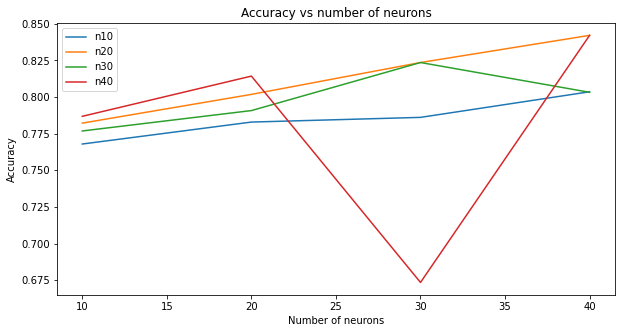

In [ ]:
number_neurons = [10,20,30,40]
n10=[np.average(test_accuracy_1_10),np.average(test_accuracy_2_10),np.average(test_accuracy_4_10),np.average(test_accuracy_8_10),]
n20=[np.average(test_accuracy_1_20),np.average(test_accuracy_2_20),np.average(test_accuracy_4_30),np.average(test_accuracy_8_40),]
n30=[np.average(test_accuracy_1_30),np.average(test_accuracy_2_30),np.average(test_accuracy_4_30),np.average(test_accuracy_8_30),]
n40=[np.average(test_accuracy_1_40),np.average(test_accuracy_2_40),np.average(test_accuracy_4_40),np.average(test_accuracy_8_40),]

plt.figure(figsize=(10,5))
sns.lineplot(x = number_neurons,y=n10,label= 'n10')
sns.lineplot(x = number_neurons,y=n20,label= 'n20')
sns.lineplot(x = number_neurons,y=n30,label= 'n30')
sns.lineplot(x = number_neurons,y=n40,label= 'n40')
plt.legend()
plt.title("Accuracy vs number of neurons")
plt.xlabel('Number of neurons')
plt.ylabel("Accuracy")

#highlight

In [ ]:
#-----test-------------
compare_test_acc=[np.average(test_accuracy_1_10),np.average(test_accuracy_2_10),np.average(test_accuracy_4_10),np.average(test_accuracy_8_10),
np.average(test_accuracy_1_20),np.average(test_accuracy_2_20),np.average(test_accuracy_4_30),np.average(test_accuracy_8_40),
np.average(test_accuracy_1_30),np.average(test_accuracy_2_30),np.average(test_accuracy_4_30),np.average(test_accuracy_8_30),
np.average(test_accuracy_1_40),np.average(test_accuracy_2_40),np.average(test_accuracy_4_40),np.average(test_accuracy_8_40),]

print(f'the highest avg_test = {np.max(compare_test_acc)} and the index is {np.argmax(compare_test_acc)}')


the highest avg_test = 0.8420677304267883 and the index is 7


In [ ]:
np.average(test_accuracy_4_30)
#that mean the highest test accuracy when using 4_hidden_layer with 40 neurons

0.8235294103622437

In [ ]:
#--------train----------
compare_train_acc=[np.average(train_accuracy_1_10),np.average(train_accuracy_2_10),np.average(train_accuracy_4_10),np.average(train_accuracy_8_10),
np.average(train_accuracy_1_20),np.average(train_accuracy_2_20),np.average(train_accuracy_4_30),np.average(train_accuracy_8_40),
np.average(train_accuracy_1_30),np.average(train_accuracy_2_30),np.average(train_accuracy_4_30),np.average(train_accuracy_8_30),
np.average(train_accuracy_1_40),np.average(train_accuracy_2_40),np.average(train_accuracy_4_40),np.average(train_accuracy_8_40),]

print(f'the highest avg_train = {np.max(compare_train_acc)} and the index is {np.argmax(compare_train_acc)}')


the highest avg_train = 0.8069324173927307 and the index is 7


In [ ]:
np.average(train_accuracy_8_40)
#that mean the highest test accuracy when using 4_hidden_layer with 40 neurons

0.8069324173927307

In [ ]:
#------validate-----------
compare_val_acc=[np.average(val_accuracy_1_10),np.average(val_accuracy_2_10),np.average(val_accuracy_4_10),np.average(val_accuracy_8_10),
np.average(val_accuracy_1_20),np.average(val_accuracy_2_20),np.average(val_accuracy_4_30),np.average(val_accuracy_8_40),
np.average(val_accuracy_1_30),np.average(val_accuracy_2_30),np.average(val_accuracy_4_30),np.average(val_accuracy_8_30),
np.average(val_accuracy_1_40),np.average(val_accuracy_2_40),np.average(val_accuracy_4_40),np.average(val_accuracy_8_40),]

print(f'the highest avg_val = {np.max(compare_val_acc)} and the index is {np.argmax(compare_val_acc)}')


the highest avg_val = 0.8082745108604431 and the index is 7


In [ ]:
np.average(val_accuracy_8_40)
#that mean the highest test accuracy when using 4_hidden_layer with 40 neurons

0.8082745108604431

#3.3

In [ ]:
#that mean the highest avg_validation accuracy when using 4_hidden_layer with 40 neurons

#build_model

In [ ]:
def bild_model_opt_lr(no_epoch,learning_rate,optimizer,x_train,y_train,x_validation,y_validation):
  mlp_model = keras.Sequential()

  mlp_model.add(keras.layers.Flatten())

  mlp_model.add(keras.layers.Dense(40,activation = 'relu'))
  mlp_model.add(keras.layers.Dense(40,activation = 'relu'))
  mlp_model.add(keras.layers.Dense(40,activation = 'relu'))
  mlp_model.add(keras.layers.Dense(40,activation = 'relu'))
  mlp_model.add(keras.layers.Dense(40,activation = 'relu'))
  mlp_model.add(keras.layers.Dense(40,activation = 'relu'))
  mlp_model.add(keras.layers.Dense(40,activation = 'relu'))
  mlp_model.add(keras.layers.Dense(40,activation = 'relu'))

  mlp_model.add(keras.layers.Dense(6,activation = 'softmax'))

  # optimizer = tfa.optimizers.AdamW(
  #     learning_rate = learning_rate,
  #     weight_decay = 0.0001
  # )

  mlp_model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics='accuracy')
  results= mlp_model.fit(
    x=x_train,
    y=y_train,
    shuffle=True,
    epochs=no_epoch,
    validation_data = (x_validation,y_validation),
    batch_size=32
  )
  return mlp_model,results

#-------show_static---------------------
def show_static(acuuracy_list,state):
  print(f'min_of {state} = {np.min(acuuracy_list)}')
  print(f'average_of {state} = {np.average(acuuracy_list)}')
  print(f'maximum_of {state} = {np.max(acuuracy_list)}')


#learning=.1 with adamw

In [ ]:
train_accuracy_1_adamw=[]
val_accuracy_1_adamw=[]
test_accuracy_1_adamw=[]
for i in range(0,5):
  #----build model-------
  optimizer = tfa.optimizers.AdamW(
      learning_rate = .1,
      weight_decay = 0.0001
  )
  mlp_model,results=bild_model_opt_lr(100,.1,optimizer,x_train_new,y_train,x_validation_new,y_validation)
  #------predict model------
  predicted=mlp_model.predict(x_test_new)
  #------evaluate model---------
  loss,acc=mlp_model.evaluate(x_test_new,y_test)
  train_accuracy_1_adamw.append(results.history['accuracy'])
  val_accuracy_1_adamw.append(results.history['val_accuracy'])
  test_accuracy_1_adamw.append(acc)

Epoch 1/100
82/82 [==============================] - 2s 9ms/step - loss: 1.8861 - accuracy: 0.3120 - val_loss: 1.6473 - val_accuracy: 0.3583
Epoch 2/100
82/82 [==============================] - 0s 4ms/step - loss: 4.3259 - accuracy: 0.2764 - val_loss: 1.6522 - val_accuracy: 0.2193
Epoch 3/100
82/82 [==============================] - 0s 3ms/step - loss: 1.6505 - accuracy: 0.2612 - val_loss: 1.6377 - val_accuracy: 0.2193
Epoch 4/100
82/82 [==============================] - 0s 4ms/step - loss: 1.6465 - accuracy: 0.2512 - val_loss: 1.6495 - val_accuracy: 0.2513
Epoch 5/100
82/82 [==============================] - 0s 4ms/step - loss: 1.6510 - accuracy: 0.2447 - val_loss: 1.6390 - val_accuracy: 0.2549
Epoch 6/100
82/82 [==============================] - 0s 3ms/step - loss: 1.6505 - accuracy: 0.2478 - val_loss: 1.6421 - val_accuracy: 0.2513
Epoch 7/100
82/82 [==============================] - 0s 2ms/step - loss: 1.6484 - accuracy: 0.2497 - val_loss: 1.6584 - val_accuracy: 0.2193
Epoch 8/100
8

In [ ]:
show_static(train_accuracy_1_adamw,'training')
print("---------------------------------------")
show_static(val_accuracy_1_adamw,'validation')
print("---------------------------------------")
show_static(test_accuracy_1_adamw,'testing')

min_of training = 0.21954944729804993
average_of training = 0.25413134810328486
maximum_of training = 0.5612829327583313
---------------------------------------
min_of validation = 0.16399286687374115
average_of validation = 0.24721212401986123
maximum_of validation = 0.565062403678894
---------------------------------------
min_of testing = 0.21746881306171417
average_of testing = 0.2452762931585312
maximum_of testing = 0.27807486057281494


#learning=.1 with SGD(M=.1)

In [ ]:
train_accuracy_1_SGD_1=[]
val_accuracy_1_SGD_1=[]
test_accuracy_1_SGD_1=[]
for i in range(0,5):
  #----build model-------
  optimizer=tf.keras.optimizers.SGD(
    learning_rate=0.1,
    momentum=0.1,
  )
  mlp_model,results=bild_model_opt_lr(100,.1,optimizer,x_train_new,y_train,x_validation_new,y_validation)
  #------predict model------
  predicted=mlp_model.predict(x_test_new)
  #------evaluate model---------
  loss,acc=mlp_model.evaluate(x_test_new,y_test)
  train_accuracy_1_SGD_1.append(results.history['accuracy'])
  val_accuracy_1_SGD_1.append(results.history['val_accuracy'])
  test_accuracy_1_SGD_1.append(acc)

Epoch 1/100
82/82 [==============================] - 1s 4ms/step - loss: 1.2638 - accuracy: 0.4624 - val_loss: 0.8553 - val_accuracy: 0.5651
Epoch 2/100
82/82 [==============================] - 0s 2ms/step - loss: 0.8632 - accuracy: 0.5834 - val_loss: 0.7638 - val_accuracy: 0.6756
Epoch 3/100
82/82 [==============================] - 0s 2ms/step - loss: 0.7648 - accuracy: 0.6506 - val_loss: 0.6721 - val_accuracy: 0.7184
Epoch 4/100
82/82 [==============================] - 0s 3ms/step - loss: 0.7120 - accuracy: 0.6880 - val_loss: 0.6193 - val_accuracy: 0.7540
Epoch 5/100
82/82 [==============================] - 0s 2ms/step - loss: 0.7920 - accuracy: 0.6502 - val_loss: 0.7213 - val_accuracy: 0.6114
Epoch 6/100
82/82 [==============================] - 0s 1ms/step - loss: 0.6908 - accuracy: 0.6961 - val_loss: 0.6123 - val_accuracy: 0.7362
Epoch 7/100
82/82 [==============================] - 0s 1ms/step - loss: 0.6502 - accuracy: 0.7266 - val_loss: 0.6221 - val_accuracy: 0.7308
Epoch 8/100
8

In [ ]:
show_static(train_accuracy_1_SGD_1,'training')
print("---------------------------------------")
show_static(val_accuracy_1_SGD_1,'validation')
print("---------------------------------------")
show_static(test_accuracy_1_SGD_1,'testing')

min_of training = 0.4516991078853607
average_of training = 0.7779755628108979
maximum_of training = 0.8277968764305115
---------------------------------------
min_of validation = 0.5329768061637878
average_of validation = 0.7815935822725296
maximum_of validation = 0.8413547277450562
---------------------------------------
min_of testing = 0.8039215803146362
average_of testing = 0.8270944833755494
maximum_of testing = 0.8413547277450562


#learning=.1 with SGD(M=.5)

In [ ]:
train_accuracy_1_SGD_5=[]
val_accuracy_1_SGD_5=[]
test_accuracy_1_SGD_5=[]
for i in range(0,5):
  #----build model-------
  optimizer=tf.keras.optimizers.SGD(
    learning_rate=0.1,
    momentum=0.5,
  )
  mlp_model,results=bild_model_opt_lr(100,.1,optimizer,x_train_new,y_train,x_validation_new,y_validation)
  #------predict model------
  predicted=mlp_model.predict(x_test_new)
  #------evaluate model---------
  loss,acc=mlp_model.evaluate(x_test_new,y_test)
  train_accuracy_1_SGD_5.append(results.history['accuracy'])
  val_accuracy_1_SGD_5.append(results.history['val_accuracy'])
  test_accuracy_1_SGD_5.append(acc)

Epoch 1/100
82/82 [==============================] - 1s 3ms/step - loss: 1.1890 - accuracy: 0.4708 - val_loss: 0.8900 - val_accuracy: 0.5526
Epoch 2/100
82/82 [==============================] - 0s 1ms/step - loss: 0.8132 - accuracy: 0.6086 - val_loss: 0.6953 - val_accuracy: 0.7005
Epoch 3/100
82/82 [==============================] - 0s 1ms/step - loss: 0.7887 - accuracy: 0.6525 - val_loss: 0.8434 - val_accuracy: 0.6078
Epoch 4/100
82/82 [==============================] - 0s 1ms/step - loss: 0.7989 - accuracy: 0.6273 - val_loss: 0.6776 - val_accuracy: 0.6132
Epoch 5/100
82/82 [==============================] - 0s 1ms/step - loss: 0.7140 - accuracy: 0.6640 - val_loss: 0.7652 - val_accuracy: 0.6988
Epoch 6/100
82/82 [==============================] - 0s 1ms/step - loss: 0.6828 - accuracy: 0.7110 - val_loss: 0.6679 - val_accuracy: 0.6845
Epoch 7/100
82/82 [==============================] - 0s 2ms/step - loss: 0.6664 - accuracy: 0.7079 - val_loss: 0.5713 - val_accuracy: 0.7576
Epoch 8/100
8

In [ ]:
show_static(train_accuracy_1_SGD_5,'training')
print("---------------------------------------")
show_static(val_accuracy_1_SGD_5,'validation')
print("---------------------------------------")
show_static(test_accuracy_1_SGD_5,'testing')

min_of training = 0.41962581872940063
average_of training = 0.7641237115859986
maximum_of training = 0.8262695670127869
---------------------------------------
min_of validation = 0.36720141768455505
average_of validation = 0.7719857397079468
maximum_of validation = 0.8449198007583618
---------------------------------------
min_of testing = 0.7201426029205322
average_of testing = 0.7996434807777405
maximum_of testing = 0.8395721912384033


#learning=.1 with SGD(M=.9)

In [ ]:
train_accuracy_1_SGD_9=[]
val_accuracy_1_SGD_9=[]
test_accuracy_1_SGD_9=[]
for i in range(0,5):
  #----build model-------
  optimizer=tf.keras.optimizers.SGD(
    learning_rate=0.1,
    momentum=0.9,
  )
  mlp_model,results=bild_model_opt_lr(100,.1,optimizer,x_train_new,y_train,x_validation_new,y_validation)
  #------predict model------
  predicted=mlp_model.predict(x_test_new)
  #------evaluate model---------
  loss,acc=mlp_model.evaluate(x_test_new,y_test)
  train_accuracy_1_SGD_9.append(results.history['accuracy'])
  val_accuracy_1_SGD_9.append(results.history['val_accuracy'])
  test_accuracy_1_SGD_9.append(acc)

Epoch 1/100
82/82 [==============================] - 1s 3ms/step - loss: 1.2695 - accuracy: 0.4212 - val_loss: 1.0092 - val_accuracy: 0.5312
Epoch 2/100
82/82 [==============================] - 0s 1ms/step - loss: 1.2956 - accuracy: 0.4563 - val_loss: 1.6450 - val_accuracy: 0.0820
Epoch 3/100
82/82 [==============================] - 0s 2ms/step - loss: 1.3453 - accuracy: 0.4166 - val_loss: 1.0765 - val_accuracy: 0.5722
Epoch 4/100
82/82 [==============================] - 0s 2ms/step - loss: 1.2596 - accuracy: 0.4345 - val_loss: 1.1556 - val_accuracy: 0.4349
Epoch 5/100
82/82 [==============================] - 0s 2ms/step - loss: 1.3954 - accuracy: 0.3967 - val_loss: 1.1148 - val_accuracy: 0.4813
Epoch 6/100
82/82 [==============================] - 0s 2ms/step - loss: 1.2687 - accuracy: 0.4173 - val_loss: 1.3483 - val_accuracy: 0.3547
Epoch 7/100
82/82 [==============================] - 0s 2ms/step - loss: 1.3294 - accuracy: 0.3960 - val_loss: 1.2187 - val_accuracy: 0.4439
Epoch 8/100
8

In [ ]:
show_static(train_accuracy_1_SGD_9,'training')
print("---------------------------------------")
show_static(val_accuracy_1_SGD_9,'validation')
print("---------------------------------------")
show_static(test_accuracy_1_SGD_9,'testing')

min_of training = 0.21420389413833618
average_of training = 0.2419007254242897
maximum_of training = 0.5620465874671936
---------------------------------------
min_of validation = 0.08199643343687057
average_of validation = 0.25185740454494954
maximum_of validation = 0.5846702456474304
---------------------------------------
min_of testing = 0.21746881306171417
average_of testing = 0.23315508365631105
maximum_of testing = 0.27807486057281494


#learning=.1 with RPROP

In [ ]:
train_accuracy_1_RPROP=[]
val_accuracy_1_RPROP=[]
test_accuracy_1_RPROP=[]
for i in range(0,5):
  #----build model-------
  optimizer=tf.keras.optimizers.RMSprop(
    learning_rate=0.1,
  )
  mlp_model,results=bild_model_opt_lr(100,.1,optimizer,x_train_new,y_train,x_validation_new,y_validation)
  #------predict model------
  predicted=mlp_model.predict(x_test_new)
  #------evaluate model---------
  loss,acc=mlp_model.evaluate(x_test_new,y_test)
  train_accuracy_1_RPROP.append(results.history['accuracy'])
  val_accuracy_1_RPROP.append(results.history['val_accuracy'])
  test_accuracy_1_RPROP.append(acc)

Epoch 1/100
82/82 [==============================] - 1s 3ms/step - loss: 327.5455 - accuracy: 0.3696 - val_loss: 23.2012 - val_accuracy: 0.2513
Epoch 2/100
82/82 [==============================] - 0s 1ms/step - loss: 1.9785 - accuracy: 0.2371 - val_loss: 1.6671 - val_accuracy: 0.2513
Epoch 3/100
82/82 [==============================] - 0s 1ms/step - loss: 1.6565 - accuracy: 0.2363 - val_loss: 1.6315 - val_accuracy: 0.2549
Epoch 4/100
82/82 [==============================] - 0s 1ms/step - loss: 1.6522 - accuracy: 0.2505 - val_loss: 1.6359 - val_accuracy: 0.2193
Epoch 5/100
82/82 [==============================] - 0s 2ms/step - loss: 1.6484 - accuracy: 0.2589 - val_loss: 1.6440 - val_accuracy: 0.2513
Epoch 6/100
82/82 [==============================] - 0s 2ms/step - loss: 1.6537 - accuracy: 0.2428 - val_loss: 1.6365 - val_accuracy: 0.2513
Epoch 7/100
82/82 [==============================] - 0s 2ms/step - loss: 1.6512 - accuracy: 0.2405 - val_loss: 1.6413 - val_accuracy: 0.2193
Epoch 8/10

In [ ]:
show_static(train_accuracy_1_RPROP,'training')
print("---------------------------------------")
show_static(val_accuracy_1_RPROP,'validation')
print("---------------------------------------")
show_static(test_accuracy_1_RPROP,'testing')

min_of training = 0.2229858785867691
average_of training = 0.24644597217440606
maximum_of training = 0.36960673332214355
---------------------------------------
min_of validation = 0.16399286687374115
average_of validation = 0.23778609877824783
maximum_of validation = 0.2549019753932953
---------------------------------------
min_of testing = 0.22638146579265594
average_of testing = 0.25739750266075134
maximum_of testing = 0.27807486057281494


#learning=.01 with adamw

In [ ]:
train_accuracy_2_adamw=[]
val_accuracy_2_adamw=[]
test_accuracy_2_adamw=[]
for i in range(0,5):
  #----build model-------
  optimizer = tfa.optimizers.AdamW(
      learning_rate = .01,
      weight_decay = 0.0001
  )
  mlp_model,results=bild_model_opt_lr(100,.01,optimizer,x_train_new,y_train,x_validation_new,y_validation)
  #------predict model------
  predicted=mlp_model.predict(x_test_new)
  #------evaluate model---------
  loss,acc=mlp_model.evaluate(x_test_new,y_test)
  train_accuracy_2_adamw.append(results.history['accuracy'])
  val_accuracy_2_adamw.append(results.history['val_accuracy'])
  test_accuracy_2_adamw.append(acc)

Epoch 1/100
82/82 [==============================] - 1s 3ms/step - loss: 1.0418 - accuracy: 0.4738 - val_loss: 0.7840 - val_accuracy: 0.5758
Epoch 2/100
82/82 [==============================] - 0s 1ms/step - loss: 0.8763 - accuracy: 0.6002 - val_loss: 0.7565 - val_accuracy: 0.6702
Epoch 3/100
82/82 [==============================] - 0s 1ms/step - loss: 0.7229 - accuracy: 0.6606 - val_loss: 0.6998 - val_accuracy: 0.6791
Epoch 4/100
82/82 [==============================] - 0s 1ms/step - loss: 0.6995 - accuracy: 0.6961 - val_loss: 0.5837 - val_accuracy: 0.7522
Epoch 5/100
82/82 [==============================] - 0s 1ms/step - loss: 0.6664 - accuracy: 0.7090 - val_loss: 0.6696 - val_accuracy: 0.6916
Epoch 6/100
82/82 [==============================] - 0s 1ms/step - loss: 0.6456 - accuracy: 0.7316 - val_loss: 0.6448 - val_accuracy: 0.7148
Epoch 7/100
82/82 [==============================] - 0s 1ms/step - loss: 0.6775 - accuracy: 0.7033 - val_loss: 0.5939 - val_accuracy: 0.7683
Epoch 8/100
8

In [ ]:
show_static(train_accuracy_2_adamw,'training')
print("---------------------------------------")
show_static(val_accuracy_2_adamw,'validation')
print("---------------------------------------")
show_static(test_accuracy_2_adamw,'testing')

min_of training = 0.473844975233078
average_of training = 0.7682260407805442
maximum_of training = 0.8155784606933594
---------------------------------------
min_of validation = 0.4955436587333679
average_of validation = 0.782798575758934
maximum_of validation = 0.8413547277450562
---------------------------------------
min_of testing = 0.8163992762565613
average_of testing = 0.8310160517692566
maximum_of testing = 0.8484848737716675


#learning=.01 with SGD(M=.1)

In [ ]:
train_accuracy_2_SGD_1=[]
val_accuracy_2_SGD_1=[]
test_accuracy_2_SGD_1=[]
for i in range(0,5):
  #----build model-------
  optimizer=tf.keras.optimizers.SGD(
    learning_rate=0.01,
    momentum=0.1,
  )
  mlp_model,results=bild_model_opt_lr(100,.01,optimizer,x_train_new,y_train,x_validation_new,y_validation)
  #------predict model------
  predicted=mlp_model.predict(x_test_new)
  #------evaluate model---------
  loss,acc=mlp_model.evaluate(x_test_new,y_test)
  train_accuracy_2_SGD_1.append(results.history['accuracy'])
  val_accuracy_2_SGD_1.append(results.history['val_accuracy'])
  test_accuracy_2_SGD_1.append(acc)

Epoch 1/100
82/82 [==============================] - 1s 4ms/step - loss: 1.7531 - accuracy: 0.2791 - val_loss: 1.7202 - val_accuracy: 0.2852
Epoch 2/100
82/82 [==============================] - 0s 1ms/step - loss: 1.6800 - accuracy: 0.3230 - val_loss: 1.6546 - val_accuracy: 0.2888
Epoch 3/100
82/82 [==============================] - 0s 1ms/step - loss: 1.5975 - accuracy: 0.3318 - val_loss: 1.5665 - val_accuracy: 0.3155
Epoch 4/100
82/82 [==============================] - 0s 1ms/step - loss: 1.4902 - accuracy: 0.3444 - val_loss: 1.4670 - val_accuracy: 0.3654
Epoch 5/100
82/82 [==============================] - 0s 1ms/step - loss: 1.3927 - accuracy: 0.4128 - val_loss: 1.3628 - val_accuracy: 0.4474
Epoch 6/100
82/82 [==============================] - 0s 1ms/step - loss: 1.2856 - accuracy: 0.4716 - val_loss: 1.2310 - val_accuracy: 0.5009
Epoch 7/100
82/82 [==============================] - 0s 1ms/step - loss: 1.1590 - accuracy: 0.5055 - val_loss: 1.0843 - val_accuracy: 0.5455
Epoch 8/100
8

In [ ]:
show_static(train_accuracy_2_SGD_1,'training')
print("---------------------------------------")
show_static(val_accuracy_2_SGD_1,'validation')
print("---------------------------------------")
show_static(test_accuracy_2_SGD_1,'testing')

min_of training = 0.2558228373527527
average_of training = 0.7421855663061142
maximum_of training = 0.817105770111084
---------------------------------------
min_of validation = 0.2513369023799896
average_of validation = 0.7429340468645096
maximum_of validation = 0.8413547277450562
---------------------------------------
min_of testing = 0.77183598279953
average_of testing = 0.8245989441871643
maximum_of testing = 0.8484848737716675


#learning=.01 with SGD(M=.5)

In [ ]:
train_accuracy_2_SGD_5=[]
val_accuracy_2_SGD_5=[]
test_accuracy_2_SGD_5=[]
for i in range(0,5):
  #----build model-------
  optimizer=tf.keras.optimizers.SGD(
    learning_rate=0.01,
    momentum=0.5,
  )
  mlp_model,results=bild_model_opt_lr(100,.01,optimizer,x_train_new,y_train,x_validation_new,y_validation)
  #------predict model------
  predicted=mlp_model.predict(x_test_new)
  #------evaluate model---------
  loss,acc=mlp_model.evaluate(x_test_new,y_test)
  train_accuracy_2_SGD_5.append(results.history['accuracy'])
  val_accuracy_2_SGD_5.append(results.history['val_accuracy'])
  test_accuracy_2_SGD_5.append(acc)

Epoch 1/100
82/82 [==============================] - 1s 3ms/step - loss: 1.7487 - accuracy: 0.2394 - val_loss: 1.7075 - val_accuracy: 0.2193
Epoch 2/100
82/82 [==============================] - 0s 1ms/step - loss: 1.6506 - accuracy: 0.3055 - val_loss: 1.5991 - val_accuracy: 0.3351
Epoch 3/100
82/82 [==============================] - 0s 1ms/step - loss: 1.4642 - accuracy: 0.4120 - val_loss: 1.3663 - val_accuracy: 0.4652
Epoch 4/100
82/82 [==============================] - 0s 1ms/step - loss: 1.2171 - accuracy: 0.5254 - val_loss: 1.0920 - val_accuracy: 0.5615
Epoch 5/100
82/82 [==============================] - 0s 1ms/step - loss: 1.0026 - accuracy: 0.5620 - val_loss: 0.8983 - val_accuracy: 0.5811
Epoch 6/100
82/82 [==============================] - 0s 1ms/step - loss: 0.8845 - accuracy: 0.5701 - val_loss: 0.8173 - val_accuracy: 0.5900
Epoch 7/100
82/82 [==============================] - 0s 2ms/step - loss: 0.8221 - accuracy: 0.6033 - val_loss: 0.7677 - val_accuracy: 0.7059
Epoch 8/100
8

In [ ]:
show_static(train_accuracy_2_SGD_5,'training')
print("---------------------------------------")
show_static(val_accuracy_2_SGD_5,'validation')
print("---------------------------------------")
show_static(test_accuracy_2_SGD_5,'testing')

min_of training = 0.22527682781219482
average_of training = 0.7592867512106896
maximum_of training = 0.8277968764305115
---------------------------------------
min_of validation = 0.2192513346672058
average_of validation = 0.7633761139512062
maximum_of validation = 0.8377896547317505
---------------------------------------
min_of testing = 0.759358286857605
average_of testing = 0.8010695219039917
maximum_of testing = 0.8163992762565613


#learning=.01 with SGD(M=.9)

In [ ]:
train_accuracy_2_SGD_9=[]
val_accuracy_2_SGD_9=[]
test_accuracy_2_SGD_9=[]
for i in range(0,5):
  #----build model-------
  optimizer=tf.keras.optimizers.SGD(
    learning_rate=0.01,
    momentum=0.9,
  )
  mlp_model,results=bild_model_opt_lr(100,.01,optimizer,x_train_new,y_train,x_validation_new,y_validation)
  #------predict model------
  predicted=mlp_model.predict(x_test_new)
  #------evaluate model---------
  loss,acc=mlp_model.evaluate(x_test_new,y_test)
  train_accuracy_2_SGD_9.append(results.history['accuracy'])
  val_accuracy_2_SGD_9.append(results.history['val_accuracy'])
  test_accuracy_2_SGD_9.append(acc)

Epoch 1/100
82/82 [==============================] - 1s 3ms/step - loss: 1.5812 - accuracy: 0.2967 - val_loss: 1.2793 - val_accuracy: 0.4742
Epoch 2/100
82/82 [==============================] - 0s 2ms/step - loss: 0.9540 - accuracy: 0.5704 - val_loss: 0.7560 - val_accuracy: 0.6649
Epoch 3/100
82/82 [==============================] - 0s 2ms/step - loss: 0.7449 - accuracy: 0.6606 - val_loss: 0.7236 - val_accuracy: 0.6809
Epoch 4/100
82/82 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.6896 - val_loss: 0.7170 - val_accuracy: 0.6809
Epoch 5/100
82/82 [==============================] - 0s 1ms/step - loss: 0.6834 - accuracy: 0.6915 - val_loss: 0.5984 - val_accuracy: 0.7362
Epoch 6/100
82/82 [==============================] - 0s 1ms/step - loss: 0.6530 - accuracy: 0.7312 - val_loss: 0.6191 - val_accuracy: 0.7415
Epoch 7/100
82/82 [==============================] - 0s 1ms/step - loss: 0.6612 - accuracy: 0.7174 - val_loss: 0.6175 - val_accuracy: 0.7398
Epoch 8/100
8

In [ ]:
show_static(train_accuracy_2_SGD_9,'training')
print("---------------------------------------")
show_static(val_accuracy_2_SGD_9,'validation')
print("---------------------------------------")
show_static(test_accuracy_2_SGD_9,'testing')

min_of training = 0.2966781258583069
average_of training = 0.7914746080636978
maximum_of training = 0.8396334648132324
---------------------------------------
min_of validation = 0.4741533100605011
average_of validation = 0.7937112299799919
maximum_of validation = 0.8395721912384033
---------------------------------------
min_of testing = 0.8181818127632141
average_of testing = 0.83743314743042
maximum_of testing = 0.8538324236869812


#learning=.01 with RPROP

In [ ]:
train_accuracy_2_RPROP=[]
val_accuracy_2_RPROP=[]
test_accuracy_2_RPROP=[]
for i in range(0,5):
  #----build model-------
  optimizer=tf.keras.optimizers.RMSprop(
    learning_rate=0.01,
  )
  mlp_model,results=bild_model_opt_lr(100,.01,optimizer,x_train_new,y_train,x_validation_new,y_validation)
  #------predict model------
  predicted=mlp_model.predict(x_test_new)
  #------evaluate model---------
  loss,acc=mlp_model.evaluate(x_test_new,y_test)
  train_accuracy_2_RPROP.append(results.history['accuracy'])
  val_accuracy_2_RPROP.append(results.history['val_accuracy'])
  test_accuracy_2_RPROP.append(acc)

Epoch 1/100
82/82 [==============================] - 1s 3ms/step - loss: 1.0589 - accuracy: 0.5296 - val_loss: 0.8111 - val_accuracy: 0.6631
Epoch 2/100
82/82 [==============================] - 0s 1ms/step - loss: 0.9261 - accuracy: 0.6464 - val_loss: 0.7256 - val_accuracy: 0.6613
Epoch 3/100
82/82 [==============================] - 0s 1ms/step - loss: 0.7744 - accuracy: 0.6575 - val_loss: 0.7305 - val_accuracy: 0.6863
Epoch 4/100
82/82 [==============================] - 0s 1ms/step - loss: 0.7229 - accuracy: 0.6842 - val_loss: 0.6918 - val_accuracy: 0.7041
Epoch 5/100
82/82 [==============================] - 0s 2ms/step - loss: 0.8639 - accuracy: 0.7083 - val_loss: 0.6431 - val_accuracy: 0.7433
Epoch 6/100
82/82 [==============================] - 0s 2ms/step - loss: 0.7410 - accuracy: 0.7003 - val_loss: 0.5651 - val_accuracy: 0.7522
Epoch 7/100
82/82 [==============================] - 0s 1ms/step - loss: 0.7782 - accuracy: 0.7289 - val_loss: 0.6737 - val_accuracy: 0.7398
Epoch 8/100
8

In [ ]:
show_static(train_accuracy_2_RPROP,'training')
print("---------------------------------------")
show_static(val_accuracy_2_RPROP,'validation')
print("---------------------------------------")
show_static(test_accuracy_2_RPROP,'testing')

min_of training = 0.48835432529449463
average_of training = 0.7668178688883781
maximum_of training = 0.8090874552726746
---------------------------------------
min_of validation = 0.5490196347236633
average_of validation = 0.7811087353229522
maximum_of validation = 0.843137264251709
---------------------------------------
min_of testing = 0.70944744348526
average_of testing = 0.7860962629318238
maximum_of testing = 0.8395721912384033


#learning=.001 with adamw

In [ ]:
train_accuracy_3_adamw=[]
val_accuracy_3_adamw=[]
test_accuracy_3_adamw=[]
for i in range(0,5):
  #----build model-------
  optimizer = tfa.optimizers.AdamW(
      learning_rate = .001,
      weight_decay = 0.0001
  )
  mlp_model,results=bild_model_opt_lr(100,.001,optimizer,x_train_new,y_train,x_validation_new,y_validation)
  #------predict model------
  predicted=mlp_model.predict(x_test_new)
  #------evaluate model---------
  loss,acc=mlp_model.evaluate(x_test_new,y_test)
  train_accuracy_3_adamw.append(results.history['accuracy'])
  val_accuracy_3_adamw.append(results.history['val_accuracy'])
  test_accuracy_3_adamw.append(acc)

Epoch 1/100
82/82 [==============================] - 1s 3ms/step - loss: 1.3673 - accuracy: 0.4674 - val_loss: 0.9076 - val_accuracy: 0.6364
Epoch 2/100
82/82 [==============================] - 0s 1ms/step - loss: 0.7468 - accuracy: 0.6774 - val_loss: 0.6733 - val_accuracy: 0.7094
Epoch 3/100
82/82 [==============================] - 0s 1ms/step - loss: 0.6480 - accuracy: 0.7297 - val_loss: 0.6049 - val_accuracy: 0.7433
Epoch 4/100
82/82 [==============================] - 0s 1ms/step - loss: 0.6153 - accuracy: 0.7453 - val_loss: 0.5604 - val_accuracy: 0.7701
Epoch 5/100
82/82 [==============================] - 0s 1ms/step - loss: 0.6052 - accuracy: 0.7488 - val_loss: 0.5615 - val_accuracy: 0.7611
Epoch 6/100
82/82 [==============================] - 0s 1ms/step - loss: 0.5907 - accuracy: 0.7553 - val_loss: 0.5332 - val_accuracy: 0.7772
Epoch 7/100
82/82 [==============================] - 0s 1ms/step - loss: 0.5753 - accuracy: 0.7637 - val_loss: 0.5391 - val_accuracy: 0.7754
Epoch 8/100
8

In [ ]:
show_static(train_accuracy_3_adamw,'training')
print("---------------------------------------")
show_static(val_accuracy_3_adamw,'validation')
print("---------------------------------------")
show_static(test_accuracy_3_adamw,'testing')

min_of training = 0.42344406247138977
average_of training = 0.8104047347307205
maximum_of training = 0.8491790890693665
---------------------------------------
min_of validation = 0.5864527821540833
average_of validation = 0.8077076654434204
maximum_of validation = 0.8467023372650146
---------------------------------------
min_of testing = 0.8217468857765198
average_of testing = 0.8345811128616333
maximum_of testing = 0.8573974967002869


#learning=.001 with SGD(M=.1)

In [ ]:
train_accuracy_3_SGD_1=[]
val_accuracy_3_SGD_1=[]
test_accuracy_3_SGD_1=[]
for i in range(0,5):
  #----build model-------
  optimizer=tf.keras.optimizers.SGD(
    learning_rate=0.001,
    momentum=0.1,
  )
  mlp_model,results=bild_model_opt_lr(100,.001,optimizer,x_train_new,y_train,x_validation_new,y_validation)
  #------predict model------
  predicted=mlp_model.predict(x_test_new)
  #------evaluate model---------
  loss,acc=mlp_model.evaluate(x_test_new,y_test)
  train_accuracy_3_SGD_1.append(results.history['accuracy'])
  val_accuracy_3_SGD_1.append(results.history['val_accuracy'])
  test_accuracy_3_SGD_1.append(acc)

Epoch 1/100
82/82 [==============================] - 1s 3ms/step - loss: 1.7982 - accuracy: 0.0882 - val_loss: 1.7936 - val_accuracy: 0.1729
Epoch 2/100
82/82 [==============================] - 0s 1ms/step - loss: 1.7868 - accuracy: 0.2982 - val_loss: 1.7830 - val_accuracy: 0.3832
Epoch 3/100
82/82 [==============================] - 0s 1ms/step - loss: 1.7772 - accuracy: 0.3910 - val_loss: 1.7741 - val_accuracy: 0.4029
Epoch 4/100
82/82 [==============================] - 0s 1ms/step - loss: 1.7691 - accuracy: 0.3860 - val_loss: 1.7666 - val_accuracy: 0.3761
Epoch 5/100
82/82 [==============================] - 0s 1ms/step - loss: 1.7619 - accuracy: 0.3879 - val_loss: 1.7597 - val_accuracy: 0.3690
Epoch 6/100
82/82 [==============================] - 0s 1ms/step - loss: 1.7552 - accuracy: 0.3910 - val_loss: 1.7533 - val_accuracy: 0.3529
Epoch 7/100
82/82 [==============================] - 0s 1ms/step - loss: 1.7488 - accuracy: 0.3940 - val_loss: 1.7471 - val_accuracy: 0.3547
Epoch 8/100
8

In [ ]:
show_static(train_accuracy_3_SGD_1,'training')
print("---------------------------------------")
show_static(val_accuracy_3_SGD_1,'validation')
print("---------------------------------------")
show_static(test_accuracy_3_SGD_1,'testing')

min_of training = 0.088201604783535
average_of training = 0.4640885841101408
maximum_of training = 0.6731576919555664
---------------------------------------
min_of validation = 0.17290551960468292
average_of validation = 0.46098039162158966
maximum_of validation = 0.6827094554901123
---------------------------------------
min_of testing = 0.591800332069397
average_of testing = 0.6573975086212158
maximum_of testing = 0.6934046149253845


#learning=.001 with SGD(M=.5)

In [ ]:
train_accuracy_3_SGD_5=[]
val_accuracy_3_SGD_5=[]
test_accuracy_3_SGD_5=[]
for i in range(0,5):
  #----build model-------
  optimizer=tf.keras.optimizers.SGD(
    learning_rate=0.001,
    momentum=0.5,
  )
  mlp_model,results=bild_model_opt_lr(100,.001,optimizer,x_train_new,y_train,x_validation_new,y_validation)
  #------predict model------
  predicted=mlp_model.predict(x_test_new)
  #------evaluate model---------
  loss,acc=mlp_model.evaluate(x_test_new,y_test)
  train_accuracy_3_SGD_5.append(results.history['accuracy'])
  val_accuracy_3_SGD_5.append(results.history['val_accuracy'])
  test_accuracy_3_SGD_5.append(acc)

Epoch 1/100
82/82 [==============================] - 1s 3ms/step - loss: 1.7852 - accuracy: 0.2917 - val_loss: 1.7785 - val_accuracy: 0.2460
Epoch 2/100
82/82 [==============================] - 0s 1ms/step - loss: 1.7720 - accuracy: 0.2841 - val_loss: 1.7644 - val_accuracy: 0.2816
Epoch 3/100
82/82 [==============================] - 0s 1ms/step - loss: 1.7592 - accuracy: 0.3173 - val_loss: 1.7515 - val_accuracy: 0.3137
Epoch 4/100
82/82 [==============================] - 0s 1ms/step - loss: 1.7474 - accuracy: 0.3333 - val_loss: 1.7398 - val_accuracy: 0.3316
Epoch 5/100
82/82 [==============================] - 0s 1ms/step - loss: 1.7364 - accuracy: 0.3322 - val_loss: 1.7288 - val_accuracy: 0.3298
Epoch 6/100
82/82 [==============================] - 0s 1ms/step - loss: 1.7259 - accuracy: 0.3303 - val_loss: 1.7184 - val_accuracy: 0.3209
Epoch 7/100
82/82 [==============================] - 0s 2ms/step - loss: 1.7157 - accuracy: 0.3162 - val_loss: 1.7083 - val_accuracy: 0.3030
Epoch 8/100
8

In [ ]:
show_static(train_accuracy_3_SGD_5,'training')
print("---------------------------------------")
show_static(val_accuracy_3_SGD_5,'validation')
print("---------------------------------------")
show_static(test_accuracy_3_SGD_5,'testing')

min_of training = 0.2539137005805969
average_of training = 0.5972928597927093
maximum_of training = 0.7594501972198486
---------------------------------------
min_of validation = 0.24598930776119232
average_of validation = 0.607229945987463
maximum_of validation = 0.7807486653327942
---------------------------------------
min_of testing = 0.7290552854537964
average_of testing = 0.744385027885437
maximum_of testing = 0.7557932138442993


#learning=.001 with SGD(M=.9)

In [ ]:
train_accuracy_3_SGD_9=[]
val_accuracy_3_SGD_9=[]
test_accuracy_3_SGD_9=[]
for i in range(0,5):
  #----build model-------
  optimizer=tf.keras.optimizers.SGD(
    learning_rate=0.001,
    momentum=0.9,
  )
  mlp_model,results=bild_model_opt_lr(100,.001,optimizer,x_train_new,y_train,x_validation_new,y_validation)
  #------predict model------
  predicted=mlp_model.predict(x_test_new)
  #------evaluate model---------
  loss,acc=mlp_model.evaluate(x_test_new,y_test)
  train_accuracy_3_SGD_9.append(results.history['accuracy'])
  val_accuracy_3_SGD_9.append(results.history['val_accuracy'])
  test_accuracy_3_SGD_9.append(acc)

Epoch 1/100
82/82 [==============================] - 1s 3ms/step - loss: 1.7633 - accuracy: 0.2543 - val_loss: 1.7308 - val_accuracy: 0.2513
Epoch 2/100
82/82 [==============================] - 0s 1ms/step - loss: 1.7011 - accuracy: 0.2543 - val_loss: 1.6775 - val_accuracy: 0.2513
Epoch 3/100
82/82 [==============================] - 0s 1ms/step - loss: 1.6468 - accuracy: 0.2543 - val_loss: 1.6269 - val_accuracy: 0.2513
Epoch 4/100
82/82 [==============================] - 0s 1ms/step - loss: 1.5798 - accuracy: 0.2871 - val_loss: 1.5523 - val_accuracy: 0.3191
Epoch 5/100
82/82 [==============================] - 0s 1ms/step - loss: 1.4731 - accuracy: 0.3467 - val_loss: 1.4479 - val_accuracy: 0.3333
Epoch 6/100
82/82 [==============================] - 0s 1ms/step - loss: 1.3805 - accuracy: 0.3440 - val_loss: 1.3714 - val_accuracy: 0.3351
Epoch 7/100
82/82 [==============================] - 0s 2ms/step - loss: 1.3070 - accuracy: 0.3738 - val_loss: 1.2950 - val_accuracy: 0.3922
Epoch 8/100
8

In [ ]:
show_static(train_accuracy_3_SGD_9,'training')
print("---------------------------------------")
show_static(val_accuracy_3_SGD_9,'validation')
print("---------------------------------------")
show_static(test_accuracy_3_SGD_9,'testing')

min_of training = 0.17793050408363342
average_of training = 0.734692630469799
maximum_of training = 0.8232149481773376
---------------------------------------
min_of validation = 0.2245989292860031
average_of validation = 0.7409162209928035
maximum_of validation = 0.8449198007583618
---------------------------------------
min_of testing = 0.7308377623558044
average_of testing = 0.7846702218055726
maximum_of testing = 0.8110516667366028


#learning=.001 with RPROP

In [ ]:
train_accuracy_3_RPROP=[]
val_accuracy_3_RPROP=[]
test_accuracy_3_RPROP=[]
for i in range(0,5):
  #----build model-------
  optimizer=tf.keras.optimizers.RMSprop(
    learning_rate=0.001,
  )
  mlp_model,results=bild_model_opt_lr(100,.001,optimizer,x_train_new,y_train,x_validation_new,y_validation)
  #------predict model------
  predicted=mlp_model.predict(x_test_new)
  #------evaluate model---------
  loss,acc=mlp_model.evaluate(x_test_new,y_test)
  train_accuracy_3_RPROP.append(results.history['accuracy'])
  val_accuracy_3_RPROP.append(results.history['val_accuracy'])
  test_accuracy_3_RPROP.append(acc)

Epoch 1/100
82/82 [==============================] - 3s 7ms/step - loss: 1.1181 - accuracy: 0.5258 - val_loss: 0.8002 - val_accuracy: 0.6346
Epoch 2/100
82/82 [==============================] - 0s 3ms/step - loss: 0.7496 - accuracy: 0.6640 - val_loss: 0.6391 - val_accuracy: 0.7130
Epoch 3/100
82/82 [==============================] - 0s 2ms/step - loss: 0.6807 - accuracy: 0.6995 - val_loss: 0.6572 - val_accuracy: 0.7237
Epoch 4/100
82/82 [==============================] - 0s 2ms/step - loss: 0.6518 - accuracy: 0.7224 - val_loss: 0.6302 - val_accuracy: 0.6881
Epoch 5/100
82/82 [==============================] - 0s 2ms/step - loss: 0.6315 - accuracy: 0.7209 - val_loss: 0.5741 - val_accuracy: 0.7611
Epoch 6/100
82/82 [==============================] - 0s 2ms/step - loss: 0.6128 - accuracy: 0.7438 - val_loss: 0.5729 - val_accuracy: 0.7237
Epoch 7/100
82/82 [==============================] - 0s 2ms/step - loss: 0.5936 - accuracy: 0.7591 - val_loss: 0.5911 - val_accuracy: 0.7362
Epoch 8/100
8

In [ ]:
show_static(train_accuracy_3_RPROP,'training')
print("---------------------------------------")
show_static(val_accuracy_3_RPROP,'validation')
print("---------------------------------------")
show_static(test_accuracy_3_RPROP,'testing')

min_of training = 0.4818633198738098
average_of training = 0.8118510884046555
maximum_of training = 0.8545246124267578
---------------------------------------
min_of validation = 0.591800332069397
average_of validation = 0.8034010692834854
maximum_of validation = 0.8467023372650146
---------------------------------------
min_of testing = 0.8342245817184448
average_of testing = 0.8413547277450562
maximum_of testing = 0.8484848737716675


#highlight

In [ ]:
#-----test-------------
compare_test_acc=[
    np.average(test_accuracy_1_adamw),
    np.average(test_accuracy_1_SGD_1),
    np.average(test_accuracy_1_SGD_5),
    np.average(test_accuracy_1_SGD_9),
    np.average(test_accuracy_1_RPROP),
    
    np.average(test_accuracy_2_adamw),
    np.average(test_accuracy_2_SGD_1),
    np.average(test_accuracy_2_SGD_5),
    np.average(test_accuracy_2_SGD_9),
    np.average(test_accuracy_2_RPROP),

    np.average(test_accuracy_3_adamw),
    np.average(test_accuracy_3_SGD_1),
    np.average(test_accuracy_3_SGD_5),
    np.average(test_accuracy_3_SGD_9),
    np.average(test_accuracy_3_RPROP),
    ]

print(f'the highest avg_test = {np.max(compare_test_acc)} and the index is {np.argmax(compare_test_acc)}')


the highest avg_test = 0.8413547277450562 and the index is 14


In [ ]:
np.average(np.average(test_accuracy_2_adamw))
#that mean the highest test accuracy when using .01 learning rate with adamw activation function

0.8310160517692566

In [ ]:
#--------train----------
compare_train_acc=[
    np.average(train_accuracy_1_adamw),
    np.average(train_accuracy_1_SGD_1),
    np.average(train_accuracy_1_SGD_5),
    np.average(train_accuracy_1_SGD_9),
    np.average(train_accuracy_1_RPROP),
    
    np.average(train_accuracy_2_adamw),
    np.average(train_accuracy_2_SGD_1),
    np.average(train_accuracy_2_SGD_5),
    np.average(train_accuracy_2_SGD_9),
    np.average(train_accuracy_2_RPROP),

    np.average(train_accuracy_3_adamw),
    np.average(train_accuracy_3_SGD_1),
    np.average(train_accuracy_3_SGD_5),
    np.average(train_accuracy_3_SGD_9),
    np.average(train_accuracy_3_RPROP),
   ]

print(f'the highest avg_train = {np.max(compare_train_acc)} and the index is {np.argmax(compare_train_acc)}')


the highest avg_train = 0.8118510884046555 and the index is 14


In [ ]:
np.average(np.average(train_accuracy_3_RPROP))
#that mean the highest train accuracy when using .01 learning rate with adamw activation function

0.8118510884046555

In [ ]:
#------validate-----------
compare_val_acc=[
    np.average(val_accuracy_1_adamw),
    np.average(val_accuracy_1_SGD_1),
    np.average(val_accuracy_1_SGD_5),
    np.average(val_accuracy_1_SGD_9),
    np.average(val_accuracy_1_RPROP),
    
    np.average(val_accuracy_2_adamw),
    np.average(val_accuracy_2_SGD_1),
    np.average(val_accuracy_2_SGD_5),
    np.average(val_accuracy_2_SGD_9),
    np.average(val_accuracy_2_RPROP),

    np.average(val_accuracy_3_adamw),
    np.average(val_accuracy_3_SGD_1),
    np.average(val_accuracy_3_SGD_5),
    np.average(val_accuracy_3_SGD_9),
    np.average(val_accuracy_3_RPROP),
  ]

print(f'the highest avg_val = {np.max(compare_val_acc)} and the index is {np.argmax(compare_val_acc)}')


the highest avg_val = 0.8077076654434204 and the index is 10


In [ ]:
np.average(np.average(val_accuracy_2_adamw))
#that mean the highest train accuracy when using .1 learning rate with adamw activation function

0.782798575758934

#final result is the best is using .01 learning rate with adamw activation function

#3.4

#build_model

In [ ]:
def bild_model_activation(no_epoch,activation_function,x_train,y_train,x_validation,y_validation):
  mlp_model = keras.Sequential()

  mlp_model.add(keras.layers.Flatten())

  mlp_model.add(keras.layers.Dense(40,activation = activation_function))
  mlp_model.add(keras.layers.Dense(40,activation = activation_function))
  mlp_model.add(keras.layers.Dense(40,activation = activation_function))
  mlp_model.add(keras.layers.Dense(40,activation = activation_function))

  mlp_model.add(keras.layers.Dense(6,activation = 'softmax'))

  optimizer = tfa.optimizers.AdamW(
      learning_rate = .01,
      weight_decay = 0.0001
  )

  mlp_model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics='accuracy')
  results= mlp_model.fit(
    x=x_train,
    y=y_train,
    shuffle=True,
    epochs=no_epoch,
    validation_data = (x_validation,y_validation),
    batch_size=32
  )
  return mlp_model,results

#-------show_static---------------------
def show_static(acuuracy_list,state):
  print(f'min_of {state} = {np.min(acuuracy_list)}')
  print(f'average_of {state} = {np.average(acuuracy_list)}')
  print(f'maximum_of {state} = {np.max(acuuracy_list)}')


#Relu

In [ ]:
train_accuracy_Relu=[]
val_accuracy_Relu=[]
test_accuracy_Relu=[]
for i in range(0,5):
  #----build model-------
  mlp_model,results=bild_model_activation(100,tf.keras.activations.relu,x_train_new,y_train,x_validation_new,y_validation)
  #------predict model------
  predicted=mlp_model.predict(x_test_new)
  #------evaluate model---------
  loss,acc=mlp_model.evaluate(x_test_new,y_test)
  train_accuracy_Relu.append(results.history['accuracy'])
  val_accuracy_Relu.append(results.history['val_accuracy'])
  test_accuracy_Relu.append(acc)

Epoch 1/100
82/82 [==============================] - 1s 4ms/step - loss: 0.8793 - accuracy: 0.6212 - val_loss: 0.6435 - val_accuracy: 0.7077
Epoch 2/100
82/82 [==============================] - 0s 2ms/step - loss: 0.6782 - accuracy: 0.7113 - val_loss: 0.6320 - val_accuracy: 0.7504
Epoch 3/100
82/82 [==============================] - 0s 1ms/step - loss: 0.6145 - accuracy: 0.7533 - val_loss: 0.5095 - val_accuracy: 0.7950
Epoch 4/100
82/82 [==============================] - 0s 1ms/step - loss: 0.5912 - accuracy: 0.7499 - val_loss: 0.7108 - val_accuracy: 0.7059
Epoch 5/100
82/82 [==============================] - 0s 1ms/step - loss: 0.6050 - accuracy: 0.7514 - val_loss: 0.5928 - val_accuracy: 0.6631
Epoch 6/100
82/82 [==============================] - 0s 1ms/step - loss: 0.6114 - accuracy: 0.7510 - val_loss: 0.6379 - val_accuracy: 0.7308
Epoch 7/100
82/82 [==============================] - 0s 2ms/step - loss: 0.5991 - accuracy: 0.7595 - val_loss: 0.5191 - val_accuracy: 0.7950
Epoch 8/100
8

In [ ]:
show_static(train_accuracy_Relu,'training')
print("---------------------------------------")
show_static(val_accuracy_Relu,'validation')
print("---------------------------------------")
show_static(test_accuracy_Relu,'testing')

min_of training = 0.6067201495170593
average_of training = 0.8028041243553161
maximum_of training = 0.8358151912689209
---------------------------------------
min_of validation = 0.6399286985397339
average_of validation = 0.801393939614296
maximum_of validation = 0.843137264251709
---------------------------------------
min_of testing = 0.7450980544090271
average_of testing = 0.8142602562904357
maximum_of testing = 0.8395721912384033


#Leaky Relu

In [ ]:
train_accuracy_Leaky_Relu=[]
val_accuracy_Leaky_Relu=[]
test_accuracy_Leaky_Relu=[]
for i in range(0,5):
  #----build model-------
  mlp_model,results=bild_model_activation(100,tf.keras.layers.LeakyReLU(alpha=.3),x_train_new,y_train,x_validation_new,y_validation)
  #------predict model------
  predicted=mlp_model.predict(x_test_new)
  #------evaluate model---------
  loss,acc=mlp_model.evaluate(x_test_new,y_test)
  train_accuracy_Leaky_Relu.append(results.history['accuracy'])
  val_accuracy_Leaky_Relu.append(results.history['val_accuracy'])
  test_accuracy_Leaky_Relu.append(acc)

Epoch 1/100
82/82 [==============================] - 1s 3ms/step - loss: 0.8459 - accuracy: 0.6124 - val_loss: 0.6460 - val_accuracy: 0.7362
Epoch 2/100
82/82 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.7048 - val_loss: 0.5778 - val_accuracy: 0.7576
Epoch 3/100
82/82 [==============================] - 0s 1ms/step - loss: 0.6212 - accuracy: 0.7331 - val_loss: 0.5759 - val_accuracy: 0.7629
Epoch 4/100
82/82 [==============================] - 0s 1ms/step - loss: 0.8008 - accuracy: 0.6571 - val_loss: 0.6675 - val_accuracy: 0.6845
Epoch 5/100
82/82 [==============================] - 0s 1ms/step - loss: 0.6384 - accuracy: 0.7247 - val_loss: 0.5668 - val_accuracy: 0.7540
Epoch 6/100
82/82 [==============================] - 0s 1ms/step - loss: 0.6326 - accuracy: 0.7266 - val_loss: 0.5721 - val_accuracy: 0.7594
Epoch 7/100
82/82 [==============================] - 0s 1ms/step - loss: 0.6172 - accuracy: 0.7323 - val_loss: 0.5620 - val_accuracy: 0.7629
Epoch 8/100
8

In [ ]:
show_static(train_accuracy_Leaky_Relu,'training')
print("---------------------------------------")
show_static(val_accuracy_Leaky_Relu,'validation')
print("---------------------------------------")
show_static(test_accuracy_Leaky_Relu,'testing')

min_of training = 0.6124475002288818
average_of training = 0.7717403591871261
maximum_of training = 0.8129056692123413
---------------------------------------
min_of validation = 0.5882353186607361
average_of validation = 0.7758074865341187
maximum_of validation = 0.8288770318031311
---------------------------------------
min_of testing = 0.759358286857605
average_of testing = 0.8003565073013306
maximum_of testing = 0.8270944952964783


#sigmoid

In [ ]:
train_accuracy_sigmoid=[]
val_accuracy_sigmoid=[]
test_accuracy_sigmoid=[]
for i in range(0,5):
  #----build model-------
  mlp_model,results=bild_model_activation(100,tf.keras.activations.sigmoid,x_train_new,y_train,x_validation_new,y_validation)
  #------predict model------
  predicted=mlp_model.predict(x_test_new)
  #------evaluate model---------
  loss,acc=mlp_model.evaluate(x_test_new,y_test)
  train_accuracy_sigmoid.append(results.history['accuracy'])
  val_accuracy_sigmoid.append(results.history['val_accuracy'])
  test_accuracy_sigmoid.append(acc)

Epoch 1/100
82/82 [==============================] - 1s 4ms/step - loss: 1.4107 - accuracy: 0.3666 - val_loss: 0.9889 - val_accuracy: 0.5330
Epoch 2/100
82/82 [==============================] - 0s 1ms/step - loss: 0.8655 - accuracy: 0.5995 - val_loss: 0.7279 - val_accuracy: 0.6524
Epoch 3/100
82/82 [==============================] - 0s 1ms/step - loss: 0.7264 - accuracy: 0.6781 - val_loss: 0.8047 - val_accuracy: 0.6435
Epoch 4/100
82/82 [==============================] - 0s 1ms/step - loss: 0.7098 - accuracy: 0.6945 - val_loss: 0.6763 - val_accuracy: 0.7005
Epoch 5/100
82/82 [==============================] - 0s 1ms/step - loss: 0.6420 - accuracy: 0.7258 - val_loss: 0.6373 - val_accuracy: 0.7130
Epoch 6/100
82/82 [==============================] - 0s 1ms/step - loss: 0.6423 - accuracy: 0.7297 - val_loss: 0.6051 - val_accuracy: 0.7629
Epoch 7/100
82/82 [==============================] - 0s 1ms/step - loss: 0.6368 - accuracy: 0.7396 - val_loss: 0.6216 - val_accuracy: 0.7308
Epoch 8/100
8

In [ ]:
show_static(train_accuracy_sigmoid,'training')
print("---------------------------------------")
show_static(val_accuracy_sigmoid,'validation')
print("---------------------------------------")
show_static(test_accuracy_sigmoid,'testing')

min_of training = 0.32302406430244446
average_of training = 0.7729469268321991
maximum_of training = 0.8125238418579102
---------------------------------------
min_of validation = 0.47593581676483154
average_of validation = 0.7830837781429291
maximum_of validation = 0.8288770318031311
---------------------------------------
min_of testing = 0.782531201839447
average_of testing = 0.8149732708930969
maximum_of testing = 0.832442045211792


#Tanh

In [ ]:
from math import tanh
train_accuracy_Tanh=[]
val_accuracy_Tanh=[]
test_accuracy_Tanh=[]
for i in range(0,5):
  #----build model-------
  mlp_model,results=bild_model_activation(100,tf.keras.activations.tanh,x_train_new,y_train,x_validation_new,y_validation)
  #------predict model------
  predicted=mlp_model.predict(x_test_new)
  #------evaluate model---------
  loss,acc=mlp_model.evaluate(x_test_new,y_test)
  train_accuracy_Tanh.append(results.history['accuracy'])
  val_accuracy_Tanh.append(results.history['val_accuracy'])
  test_accuracy_Tanh.append(acc)

Epoch 1/100
82/82 [==============================] - 1s 3ms/step - loss: 0.7961 - accuracy: 0.6445 - val_loss: 0.7481 - val_accuracy: 0.6791
Epoch 2/100
82/82 [==============================] - 0s 1ms/step - loss: 0.6828 - accuracy: 0.7064 - val_loss: 0.6253 - val_accuracy: 0.7398
Epoch 3/100
82/82 [==============================] - 0s 2ms/step - loss: 0.6494 - accuracy: 0.7159 - val_loss: 0.5780 - val_accuracy: 0.7487
Epoch 4/100
82/82 [==============================] - 0s 1ms/step - loss: 0.6196 - accuracy: 0.7335 - val_loss: 0.6000 - val_accuracy: 0.7219
Epoch 5/100
82/82 [==============================] - 0s 1ms/step - loss: 0.6428 - accuracy: 0.7289 - val_loss: 0.6386 - val_accuracy: 0.7398
Epoch 6/100
82/82 [==============================] - 0s 2ms/step - loss: 0.6033 - accuracy: 0.7407 - val_loss: 0.6143 - val_accuracy: 0.6898
Epoch 7/100
82/82 [==============================] - 0s 1ms/step - loss: 0.5813 - accuracy: 0.7629 - val_loss: 0.5101 - val_accuracy: 0.8021
Epoch 8/100
8

In [ ]:
show_static(train_accuracy_Tanh,'training')
print("---------------------------------------")
show_static(val_accuracy_Tanh,'validation')
print("---------------------------------------")
show_static(test_accuracy_Tanh,'testing')

min_of training = 0.6445208191871643
average_of training = 0.7819656369686127
maximum_of training = 0.8220694661140442
---------------------------------------
min_of validation = 0.6470588445663452
average_of validation = 0.7810267373323441
maximum_of validation = 0.8342245817184448
---------------------------------------
min_of testing = 0.686274528503418
average_of testing = 0.7882352948188782
maximum_of testing = 0.8288770318031311


#highlight

In [ ]:
#-----test-------------
compare_test_acc=[
    np.average(test_accuracy_Relu),
    np.average(test_accuracy_Leaky_Relu),
    np.average(test_accuracy_sigmoid),
    np.average(test_accuracy_Tanh),
    ]

print(f'the highest avg_test = {np.max(compare_test_acc)} and the index is {np.argmax(compare_test_acc)}')


the highest avg_test = 0.8149732708930969 and the index is 2


In [ ]:
np.average(np.average(test_accuracy_sigmoid))
#that mean the highest test accuracy when using Relu activation function

0.8149732708930969

#plot

Epoch 1/100
82/82 [==============================] - 1s 3ms/step - loss: 1.3748 - accuracy: 0.3872 - val_loss: 0.8530 - val_accuracy: 0.5918
Epoch 2/100
82/82 [==============================] - 0s 1ms/step - loss: 0.8298 - accuracy: 0.6231 - val_loss: 0.7285 - val_accuracy: 0.6328
Epoch 3/100
82/82 [==============================] - 0s 1ms/step - loss: 0.7506 - accuracy: 0.6464 - val_loss: 0.7153 - val_accuracy: 0.6364
Epoch 4/100
82/82 [==============================] - 0s 1ms/step - loss: 0.7263 - accuracy: 0.6552 - val_loss: 0.6532 - val_accuracy: 0.6845
Epoch 5/100
82/82 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.6854 - val_loss: 0.6396 - val_accuracy: 0.7077
Epoch 6/100
82/82 [==============================] - 0s 1ms/step - loss: 0.6655 - accuracy: 0.7121 - val_loss: 0.6329 - val_accuracy: 0.7094
Epoch 7/100
82/82 [==============================] - 0s 1ms/step - loss: 0.6400 - accuracy: 0.7339 - val_loss: 0.6161 - val_accuracy: 0.7558
Epoch 8/100
8

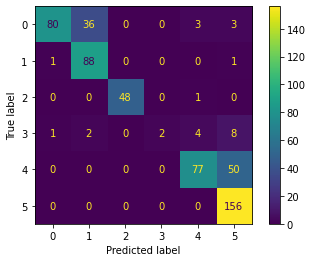

In [ ]:
#because the relu is the best plot confuson here
train_accuracy_Relu=[]
val_accuracy_Relu=[]
test_accuracy_Relu=[]
for i in range(0,5):
  #----build model-------
  mlp_model,results=bild_model_activation(100,tf.keras.activations.sigmoid,x_train_new,y_train,x_validation_new,y_validation)
  #------predict model------
  predicted=mlp_model.predict(x_test_new)
  #------evaluate model---------
  loss,acc=mlp_model.evaluate(x_test_new,y_test)
  train_accuracy_Relu.append(results.history['accuracy'])
  val_accuracy_Relu.append(results.history['val_accuracy'])
  test_accuracy_Relu.append(acc)
plot_confusion(y_test,transform_pred(predicted))